In [44]:
## Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingCVRegressor
import math
from scipy import stats
from scipy.special import boxcox1p
from scipy.stats import f_oneway
from scipy.stats import boxcox_normmax, skew
from sklearn.cluster import KMeans
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder, PowerTransformer, RobustScaler, StandardScaler
from sklearn.svm import SVR
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBRegressor

In [2]:
## Adjusting the maximum number of displayed columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
## Importing the dataset
df_train =  pd.read_csv('train.csv')
df_test =  pd.read_csv('test.csv')

### Understanding the data

In [4]:
## Dimension of the data
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [5]:
df_train.head(20)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1          60       RL         65.0     8450   Pave   NaN      Reg   
1    2          20       RL         80.0     9600   Pave   NaN      Reg   
2    3          60       RL         68.0    11250   Pave   NaN      IR1   
3    4          70       RL         60.0     9550   Pave   NaN      IR1   
4    5          60       RL         84.0    14260   Pave   NaN      IR1   
5    6          50       RL         85.0    14115   Pave   NaN      IR1   
6    7          20       RL         75.0    10084   Pave   NaN      Reg   
7    8          60       RL          NaN    10382   Pave   NaN      IR1   
8    9          50       RM         51.0     6120   Pave   NaN      Reg   
9   10         190       RL         50.0     7420   Pave   NaN      Reg   
10  11          20       RL         70.0    11200   Pave   NaN      Reg   
11  12          60       RL         85.0    11924   Pave   NaN      IR1   
12  13          20       RL          NaN    12968   Pave   NaN      IR2   
13  14          20       RL         91.0    10652   Pave   NaN      IR1   
14  15          20       RL          NaN    10920   Pave   NaN      IR1   
15  16          45       RM         51.0     6120   Pave   NaN      Reg   
16  17          20       RL          NaN    11241   Pave   NaN      IR1   
17  18          90       RL         72.0    10791   Pave   NaN      Reg   
18  19          20       RL         66.0    13695   Pave   NaN      Reg   
19  20          20       RL         70.0     7560   Pave   NaN      Reg   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5          Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7          Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8          Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9          Lvl    AllPub    Corner       Gtl      BrkSide     Artery   
10         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
11         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
12         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
13         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
14         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
15         Lvl    AllPub    Corner       Gtl      BrkSide       Norm   
16         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
17         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
18         Lvl    AllPub    Inside       Gtl      SawyerW       RRAe   
19         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0        Norm     1Fam     2Story            7            5       2003   
1        Norm     1Fam     1Story            6            8       1976   
2        Norm     1Fam     2Story            7            5       2001   
3        Norm     1Fam     2Story            7            5       1915   
4        Norm     1Fam     2Story            8            5       2000   
5        Norm     1Fam     1.5Fin            5            5       1993   
6        Norm     1Fam     1Story            8            5       2004   
7        Norm     1Fam     2Story            7            6       1973   
8        Norm     1Fam     1.5Fin            7            5       1931   
9      Artery   2fmCon     1.5Unf            5            6       1939   
10       Norm     1Fam     1Story            5            5       1965   
11       Norm     1Fam     

In [6]:
df_train.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          3
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

In [7]:
##checking null values
df_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

#### There are plenty of columns that have missing values.

In [8]:
## Descriptive statistical analysis of data
df_train.describe(include = 'all')

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
count     91     1460        1460      1460      1460      1460         1460   
unique     2        4           4         2         5         3           25   
top     Grvl      Reg         Lvl    AllPub    Inside       Gtl        NAmes   
freq      50      925        1311      1459      1052      1382          225   
mean     NaN      NaN         NaN       NaN       NaN       NaN          NaN   
std      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
min      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
25%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
50%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
75%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
max      NaN      NaN         NaN       NaN       NaN       NaN          NaN   

       Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
count        1460       1460     1460       1460  1460.000000  1460.000000   
unique          9          8        5          8          NaN          NaN   
top          Norm       Norm     1Fam     1Story          NaN          NaN   
freq         1260       1445     1220        726          NaN          NaN   
mean          NaN        NaN      NaN        NaN     6.099315     5.575342   
std           NaN        NaN      NaN        NaN     1.382997     1.112799   
min           NaN        NaN      NaN        NaN     1.000000     1.000000   
25%           NaN        NaN      NaN        NaN     5.000000     5.000000   
50%           NaN        NaN      NaN        NaN     6.000000     5.000000   
75%           NaN        NaN      NaN        NaN     7.000000     6.000000   
max           NaN        NaN      NaN        NaN    10.000000     9.000000   

          YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
count   1460.000000   1460.000000      1460     1460        1460        1460   
unique          NaN           NaN         6        8          15          16   
top             NaN           NaN     Gable  CompShg     VinylSd     VinylSd   
freq            NaN           NaN      1141     1434         515         504   
mean    1971.267808   1984.865753       NaN      NaN         NaN         NaN   
std       30.202904     20.645407       NaN      NaN         NaN         NaN   
min     1872.000000   1950.000000       NaN      NaN         NaN         NaN   
25%     1954.000000   1967.000000       NaN      NaN         NaN         NaN   
50%     1973.000000   1994.000000       NaN      NaN         NaN         NaN   
75%     2000.000000   2004.000000       NaN      NaN         NaN         NaN   
max     2010.000000   2010.000000       NaN      NaN         NaN         NaN   

       MasVnrType   MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
count         588  1452.000000      1460      1460       1460     1423   
unique          3          NaN         4         

#### There are few columns such as LotArea, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF,1stFlrSF, 2ndFlrSF, GrLivArea, MiscVal that have high STD. It can  make it difficult to accurately predict future outcomes. Models may struggle to capture the underlying patterns in the data, leading to less accurate predictions. So we have take care of it either by standardizing or using model that are robust t high variability
#### There are columns with moderate cardinality and columns such as Neighborhood, Exterior1st, Exterior2nd have high cardinality. Need to manage it using different encoding techniques.

## Data preprocessing 1

In [9]:
##Since id is of no use in the analysis we can simply drop it from training and testing set.
df_train.drop(columns="Id",inplace=True)
test_id = df_test['Id'] ## saving the ID of customers from test set for sample submission.
df_test.drop(columns="Id",inplace=True)

In [10]:
print(df_train.shape)
print(df_test.shape)

(1460, 80)
(1459, 79)


In [11]:
## Function to print no. of missing value and there percentage for columns that have missing values.
def missing_values_summary(df):
    total_rows = df.shape[0]
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / total_rows) * 100
    missing_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
    missing_summary = missing_summary[(missing_summary['Missing Values'] != 0)]
    cols_values_missing = missing_summary.shape[0]
    print(f'{cols_values_missing} columns have missing values')
    return missing_summary

In [12]:
## Percentage of missing values.
missing_values_summary(df_train)

19 columns have missing values


Missing Values  Percentage
LotFrontage              259   17.739726
Alley                   1369   93.767123
MasVnrType               872   59.726027
MasVnrArea                 8    0.547945
BsmtQual                  37    2.534247
BsmtCond                  37    2.534247
BsmtExposure              38    2.602740
BsmtFinType1              37    2.534247
BsmtFinType2              38    2.602740
Electrical                 1    0.068493
FireplaceQu              690   47.260274
GarageType                81    5.547945
GarageYrBlt               81    5.547945
GarageFinish              81    5.547945
GarageQual                81    5.547945
GarageCond                81    5.547945
PoolQC                  1453   99.520548
Fence                   1179   80.753425
MiscFeature             1406   96.301370

Alley
Grvl    50
Pave    41
Name: count, dtype: int64


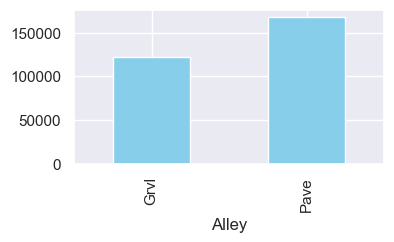

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64


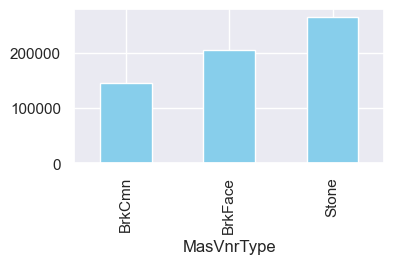

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64


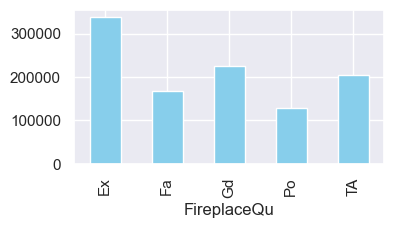

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64


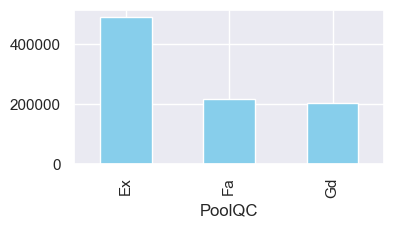

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64


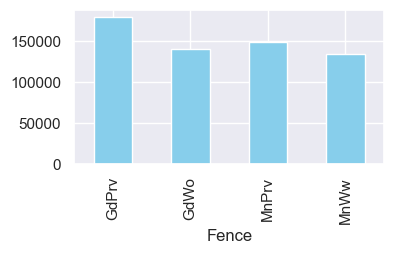

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64


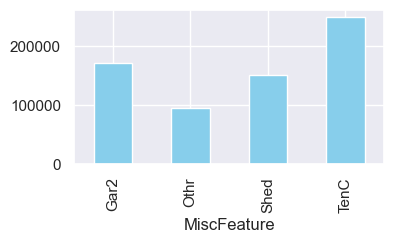

In [13]:
## There are 6 columns that have more then 40% of the missing values.And all of these columns are categorical.
##Lets get some insights before deleting them.
Features= ['Alley', 'MasVnrType', 'FireplaceQu','PoolQC', 'Fence','MiscFeature']
for column in Features:
    plt.figure(figsize=(4, 2))
    df_grouped = df_train.groupby(column)['SalePrice'].mean()
    df_grouped.plot(kind='bar', color='skyblue')
    print(df_train[column].value_counts())
    plt.show()

#### Though the missing values can be filled with methods such as imputation but in this case it can lead to bias, overfitting and can effect the prediction accuracy as they are directly associated with price. So it's better to delete this columns.

In [14]:
## Deleting columns from training as testing data.
df_train.drop(columns=Features,inplace=True)
df_test.drop(columns=Features,inplace=True)

### Handling missing values of training data

In [15]:
## Percentage of missing values in df_train.
missing_values_summary(df_train)

13 columns have missing values


Missing Values  Percentage
LotFrontage              259   17.739726
MasVnrArea                 8    0.547945
BsmtQual                  37    2.534247
BsmtCond                  37    2.534247
BsmtExposure              38    2.602740
BsmtFinType1              37    2.534247
BsmtFinType2              38    2.602740
Electrical                 1    0.068493
GarageType                81    5.547945
GarageYrBlt               81    5.547945
GarageFinish              81    5.547945
GarageQual                81    5.547945
GarageCond                81    5.547945

### Numerical columns

In [16]:
df_train[['LotFrontage', 'MasVnrArea','GarageYrBlt']].describe()

LotFrontage   MasVnrArea  GarageYrBlt
count  1201.000000  1452.000000  1379.000000
mean     70.049958   103.685262  1978.506164
std      24.284752   181.066207    24.689725
min      21.000000     0.000000  1900.000000
25%      59.000000     0.000000  1961.000000
50%      69.000000     0.000000  1980.000000
75%      80.000000   166.000000  2002.000000
max     313.000000  1600.000000  2010.000000

In [17]:
## The column LotFrontage is positive skewed as mean > median we will fill the missing values with median imputation. 
df_train['LotFrontage']= df_train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
## The column MasVnrArea have 8 columns missing so we will fill it with 0
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0)
## The columns have 81 missing value we can't fill it with median beacuse there are possibility that there are no garage or the grage can't be constructed before the house construction 
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(0)

### Categorical columns

In [18]:
df_train[['BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
          'GarageFinish', 'GarageQual', 'GarageCond']].describe(include = 'object')

BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Electrical  \
count      1423     1423         1422         1423         1422       1459   
unique        4        4            4            6            6          5   
top          TA       TA           No          Unf          Unf      SBrkr   
freq        649     1311          953          430         1256       1334   

       GarageType GarageFinish GarageQual GarageCond  
count        1379         1379       1379       1379  
unique          6            3          5          5  
top        Attchd          Unf         TA         TA  
freq          870          605       1311       1326

In [19]:
## Garage columns
df_train['GarageType'] = df_train['GarageType'].fillna('NA')
df_train['GarageFinish'] = df_train['GarageFinish'].fillna('NA')
df_train['GarageQual'] = df_train['GarageQual'].fillna('NA')
df_train['GarageCond'] = df_train['GarageCond'].fillna('NA')

In [20]:
## Basement columns
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    df_train[col] = df_train[col].fillna('NA')

In [21]:
## Electrical columns
## We can fill it on the basis of frequency
df_train['Electrical'] = df_train['Electrical'].fillna('SBrkr')

In [22]:
##checking for null values to confirm the changes
df_train.isnull().sum().sum()

0

In [23]:
df_train.shape

(1460, 74)

### Handling missing values of test data

In [24]:
## Percentage of missing values in df_test.
missing_values_summary(df_test)

27 columns have missing values


Missing Values  Percentage
MSZoning                   4    0.274160
LotFrontage              227   15.558602
Utilities                  2    0.137080
Exterior1st                1    0.068540
Exterior2nd                1    0.068540
MasVnrArea                15    1.028101
BsmtQual                  44    3.015764
BsmtCond                  45    3.084304
BsmtExposure              44    3.015764
BsmtFinType1              42    2.878684
BsmtFinSF1                 1    0.068540
BsmtFinType2              42    2.878684
BsmtFinSF2                 1    0.068540
BsmtUnfSF                  1    0.068540
TotalBsmtSF                1    0.068540
BsmtFullBath               2    0.137080
BsmtHalfBath               2    0.137080
KitchenQual                1    0.068540
Functional                 2    0.137080
GarageType                76    5.209047
GarageYrBlt               78    5.346127
GarageFinish              78    5.346127
GarageCars                 1    0.068540
GarageArea                 1    0.068540
GarageQual                78    5.346127
GarageCond                78    5.346127
SaleType                   1    0.068540

### Categorical columns

In [25]:
df_test[['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'SaleType']].describe(include='object')

MSZoning Utilities Exterior1st Exterior2nd BsmtQual BsmtCond  \
count      1455      1457        1458        1458     1415     1414   
unique        5         1          13          15        4        4   
top          RL    AllPub     VinylSd     VinylSd       TA       TA   
freq       1114      1457         510         510      634     1295   

       BsmtExposure BsmtFinType1 BsmtFinType2 KitchenQual Functional  \
count          1415         1417         1417        1458       1457   
unique            4            6            6           4          7   
top              No          GLQ          Unf          TA        Typ   
freq            951          431         1237         757       1357   

       GarageType GarageFinish GarageQual GarageCond SaleType  
count        1383         1381       1381       1381     1458  
unique          6            3          4          5        9  
top        Attchd          Unf         TA         TA       WD  
freq          853          625       1293       1328     1258

In [26]:
## we will fill the data according to frequency occurence
df_test['MSZoning'] = df_test['MSZoning'].fillna('RL')
df_test['Utilities'] = df_test['Utilities'].fillna('AllPub')
df_test['Exterior1st'] = df_test['Exterior1st'].fillna('VinylSd')
df_test['Exterior2nd'] = df_test['Exterior2nd'].fillna('Other')
df_test['BsmtQual'] = df_test['BsmtQual'].fillna('NA')
df_test['BsmtCond'] = df_test['BsmtCond'].fillna('NA')
df_test['BsmtExposure'] = df_test['BsmtExposure'].fillna('NA')
df_test['BsmtFinType1'] = df_test['BsmtFinType1'].fillna('NA')
df_test['BsmtFinType2'] = df_test['BsmtFinType2'].fillna('NA')
df_test['KitchenQual'] = df_test['KitchenQual'].fillna('TA')
df_test['Functional'] = df_test['Functional'].fillna('Typ')
df_test['GarageType'] = df_test['GarageType'].fillna('NA')
df_test['GarageFinish'] = df_test['GarageFinish'].fillna('NA')
df_test['GarageQual'] = df_test['GarageQual'].fillna('NA')
df_test['GarageCond'] = df_test['GarageCond'].fillna('NA')
df_test['SaleType'] = df_test['SaleType'].fillna('Oth')

#### Numerical columns 

In [27]:
df_test[['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'SaleType']].describe()

LotFrontage   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count  1232.000000  1444.000000  1458.000000  1458.000000  1458.000000   
mean     68.580357   100.709141   439.203704    52.619342   554.294925   
std      22.376841   177.625900   455.268042   176.753926   437.260486   
min      21.000000     0.000000     0.000000     0.000000     0.000000   
25%      58.000000     0.000000     0.000000     0.000000   219.250000   
50%      67.000000     0.000000   350.500000     0.000000   460.000000   
75%      80.000000   164.000000   753.500000     0.000000   797.750000   
max     200.000000  1290.000000  4010.000000  1526.000000  2140.000000   

       TotalBsmtSF  BsmtFullBath  BsmtHalfBath  GarageYrBlt   GarageCars  \
count  1458.000000   1457.000000   1457.000000  1381.000000  1458.000000   
mean   1046.117970      0.434454      0.065202  1977.721217     1.766118   
std     442.898624      0.530648      0.252468    26.431175     0.775945   
min       0.000000      0.000000      0.000000  1895.000000     0.000000   
25%     784.000000      0.000000      0.000000  1959.000000     1.000000   
50%     988.000000      0.000000      0.000000  1979.000000     2.000000   
75%    1305.000000      1.000000      0.000000  2002.000000     2.000000   
max    5095.000000      3.000000      2.000000  2207.000000     5.000000   

        GarageArea  
count  1458.000000  
mean    472.768861  
std     217.048611  
min       0.000000  
25%     318.000000  
50%     480.000000  
75%     576.000000  
max    1488.000000

In [28]:
df_test['LotFrontage']= df_test.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(0)
df_test['BsmtFinSF1']= df_test.groupby('BsmtFinType1')['BsmtFinSF1'].transform(lambda x: x.fillna(x.median()))
df_test['BsmtFinSF2']= df_test.groupby('BsmtFinType2')['BsmtFinSF2'].transform(lambda x: x.fillna(x.median()))
df_test['BsmtUnfSF']= df_test['BsmtUnfSF'].fillna(df_test["BsmtUnfSF"].median())
df_test['TotalBsmtSF']= df_test['TotalBsmtSF'].fillna(0)
df_test['BsmtFullBath']= df_test['BsmtFullBath'].fillna(0)
df_test['BsmtHalfBath']= df_test['BsmtHalfBath'].fillna(0)
df_test['GarageYrBlt']= df_test['GarageYrBlt'].fillna(0)
df_test['GarageCars']= df_test['GarageCars'].fillna(0)
df_test['GarageArea']= df_test['GarageArea'].fillna(0)

In [29]:
df_test.isnull().sum().sum()

0

In [30]:
df_test.shape

(1459, 73)

## Exploratory Data Analysis

#### Analyzing and visualzing target variable

In [31]:
df_train.SalePrice.describe().to_frame()

SalePrice
count    1460.000000
mean   180921.195890
std     79442.502883
min     34900.000000
25%    129975.000000
50%    163000.000000
75%    214000.000000
max    755000.000000

In [32]:
df_train.SalePrice.skew()

1.8828757597682129

In [33]:
def outliners(array):
    iqr_q1 = np.quantile(array, 0.25)
    iqr_q3 = np.quantile(array, 0.75)
    med = np.median(array)
    
    iqr = iqr_q3 - iqr_q1
    
    upper_bound = iqr_q3 + (1.5 * iqr)
    lower_bound = iqr_q1 - (1.5 * iqr)
    
    outliner = array[(array <= lower_bound) | (array >= upper_bound)]
    No_of_Outliner = print(f'The column have {len(outliner)} outliner') 
    return No_of_Outliner

In [34]:
outliners(df_train.SalePrice)

The column have 61 outliner


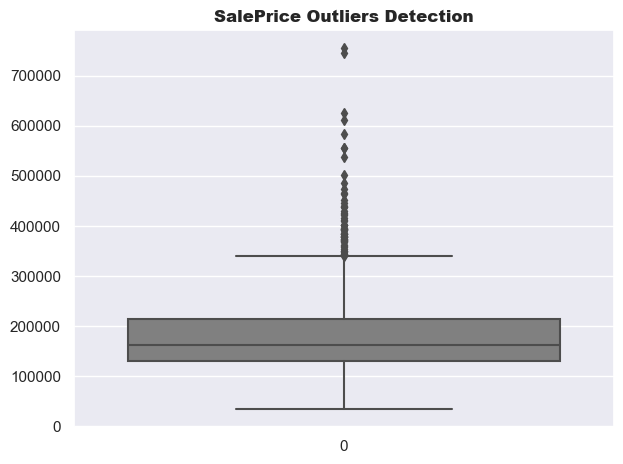

In [35]:
sns.boxplot(df_train["SalePrice"],color="grey")
plt.title("SalePrice Outliers Detection",fontweight="black",size=12)
plt.tight_layout()
plt.show()

#### The target is positive skewed and have 61 outliners. It means it's not normally distributréd and need to be transformed.

#### Analyzing the continous features.

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

def frequency_data(data):
    sns.set_palette('Purples_r')
    num_cols = len(data.columns)
    num_rows = (num_cols + 2) // 3 
    fig, ax = plt.subplots(num_rows, 3, figsize=(20, 6*num_rows))

    for i, col in enumerate(data.columns):
        sns.histplot(data[col], kde=True, ax=ax[i//3, i%3])
        ax[i//3, i%3].set_xticklabels(ax[i//3, i%3].get_xticklabels(), rotation=90, fontsize=16)
        ax[i//3, i%3].set_yticklabels(ax[i//3, i%3].get_yticklabels(), fontsize=16)
        ax[i//3, i%3].set_xlabel(col, fontsize=16) 
        ax[i//3, i%3].set_ylabel('Frequency', fontsize=16) 
        
        skewness = skew(data[col])
        ax[i//3, i%3].text(0.95, 0.95, f'Skewness: {skewness:.2f}', transform=ax[i//3, i%3].transAxes,
                           verticalalignment='top', horizontalalignment='right', fontsize=18,
                           bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

    for j in range(i+1, num_rows*3):
        ax[j//3, j%3].axis('off')

    plt.tight_layout()
    plt.show()

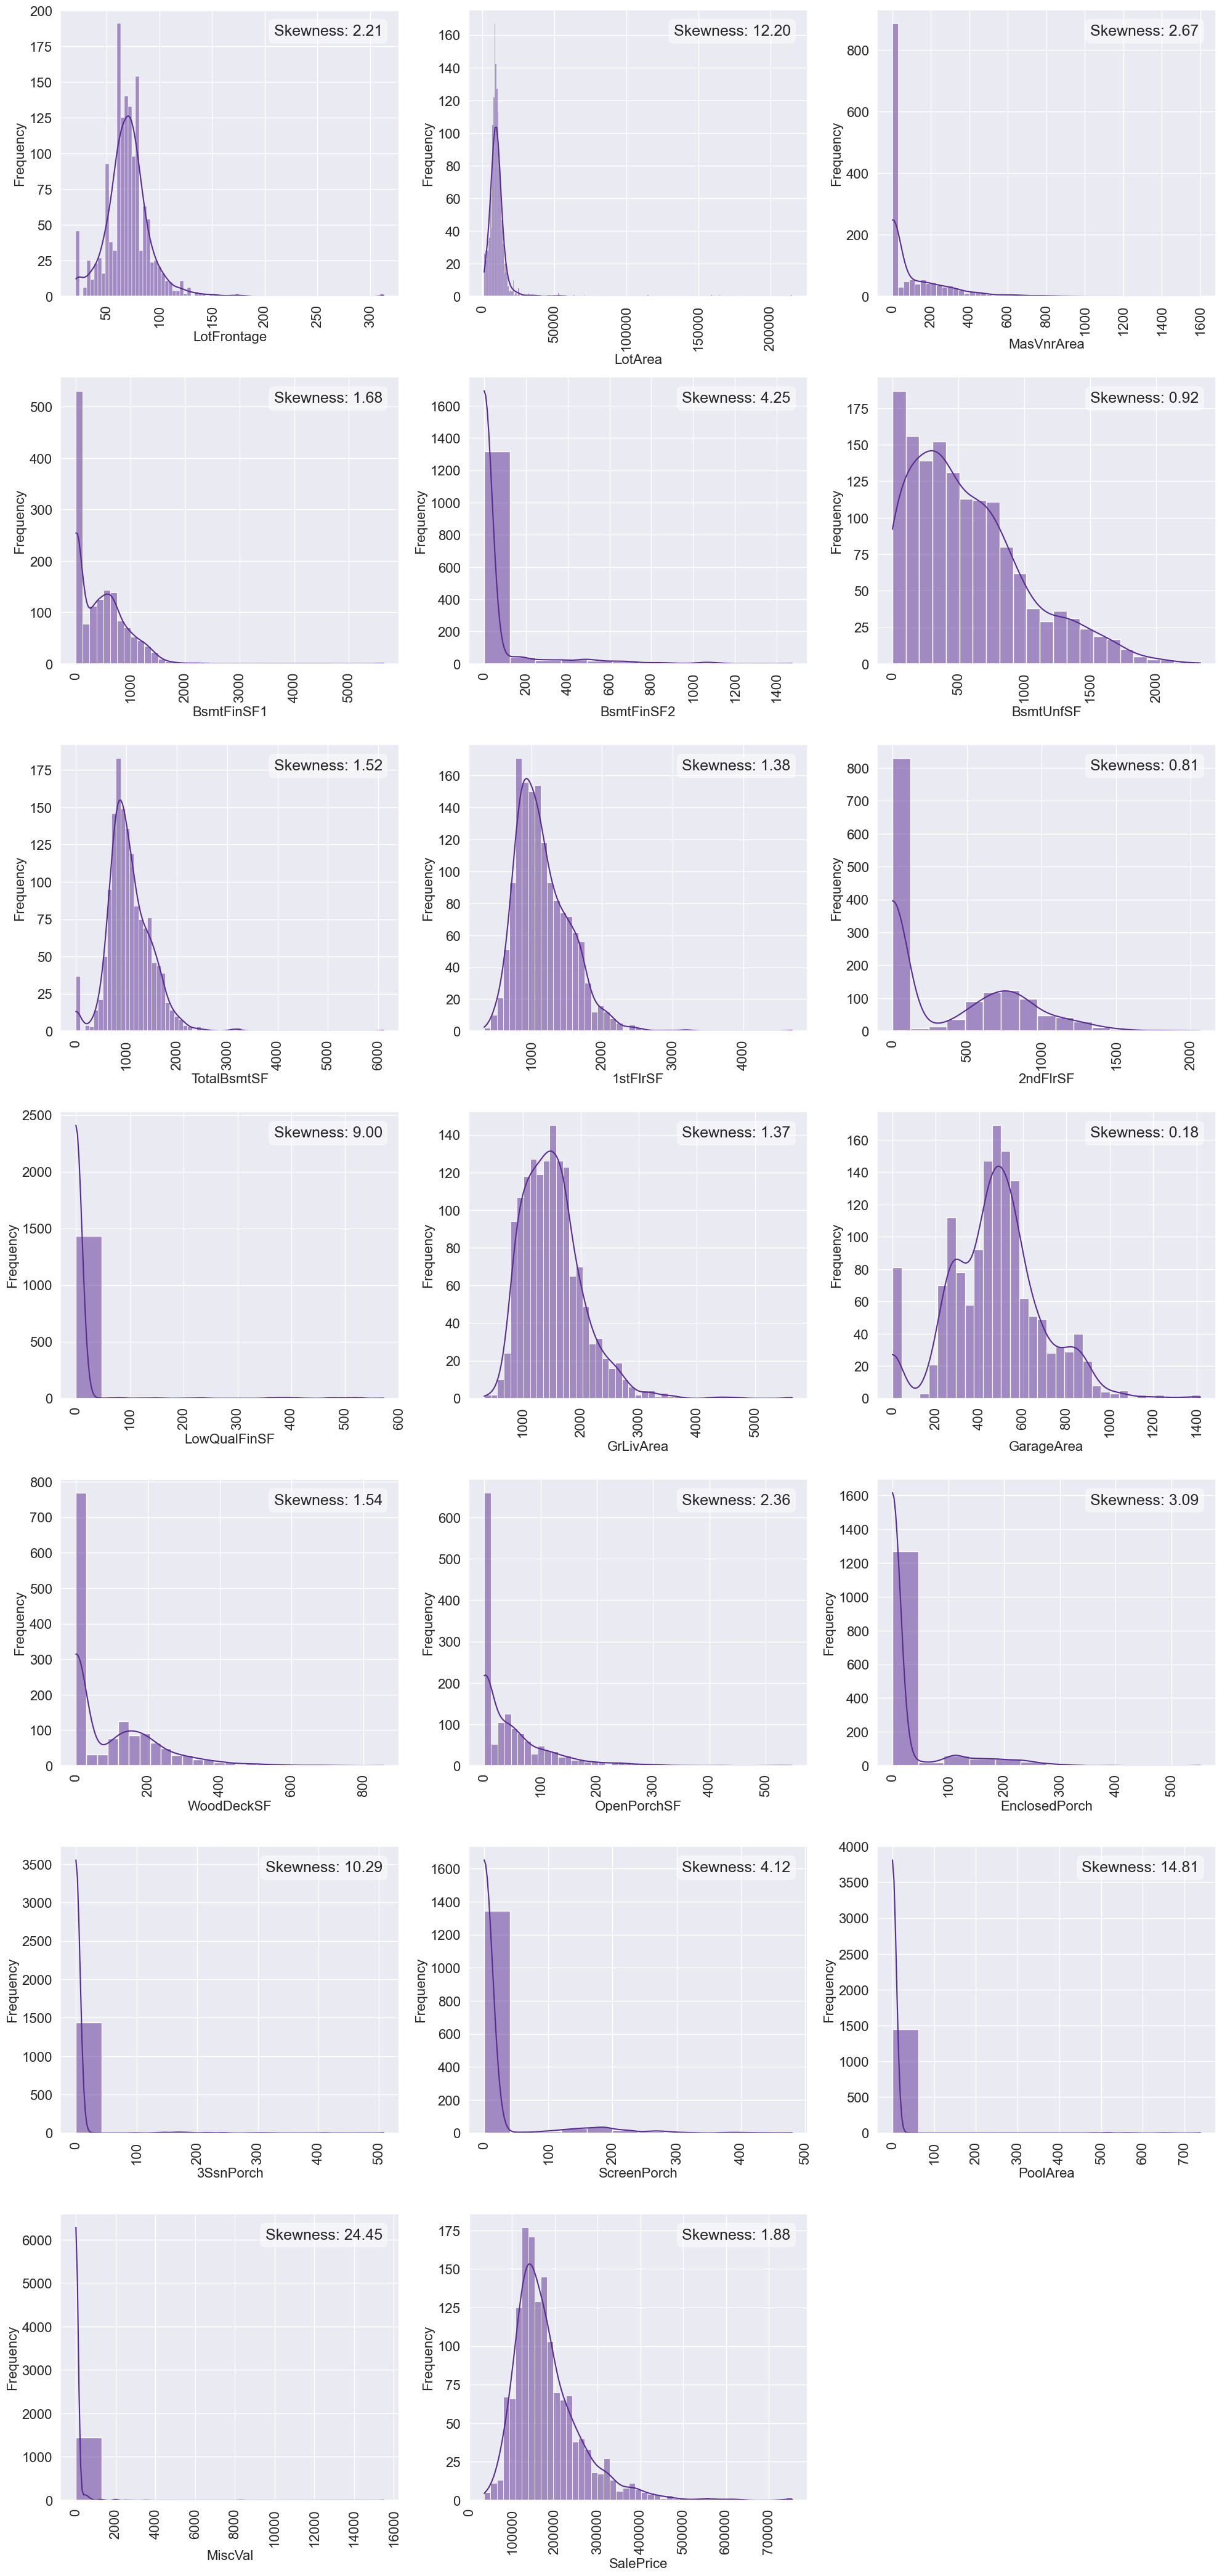

In [37]:
con_fe = df_train[["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF",
            "1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF",
            "EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal", 'SalePrice']]
frequency_data(con_fe)

#### Most of the columns are positively skewed, so we need to transform the data.

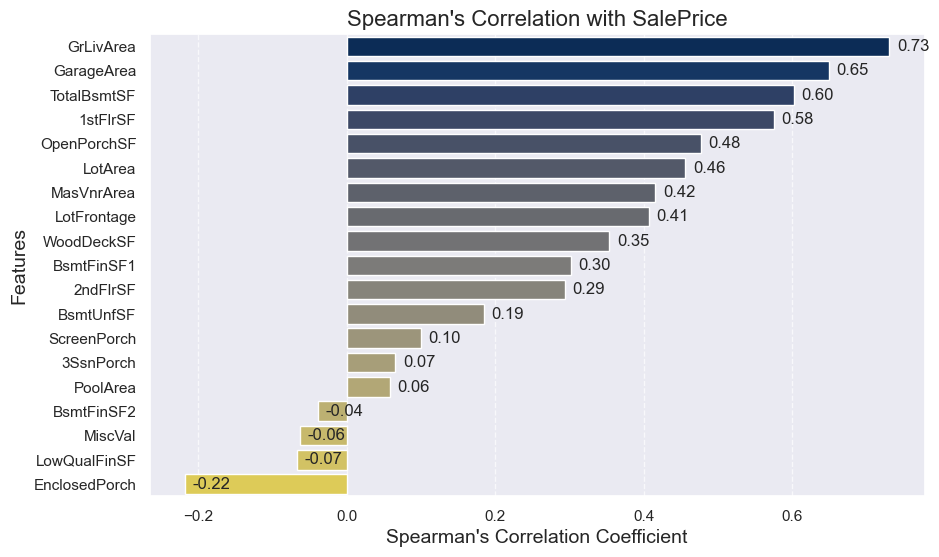

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_spearman_correlation(data, target_column):

    spearman_corr = data.corr(method='spearman')[target_column].drop(target_column)
    
    spearman_corr = spearman_corr.sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=spearman_corr.values, y=spearman_corr.index, palette='cividis')
    plt.title(f'Spearman\'s Correlation with {target_column}', fontsize=16)
    plt.xlabel('Spearman\'s Correlation Coefficient', fontsize=14)
    plt.ylabel('Features', fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    for i, v in enumerate(spearman_corr.values):
        ax.text(v + 0.01, i, f'{v:.2f}', va='center', fontsize=12)
    plt.show()

plot_spearman_correlation(con_fe, 'SalePrice')



#### There are 4 columns with negative cofficient and many others with low positive cofficient. While columns such as GrLivArea, GarageArea, TotalBsmtSF have the highest correlation coffecient.

In [40]:
cat_fe = df_train[['MSSubClass', 'MSZoning', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2',
        'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'SalePrice']]

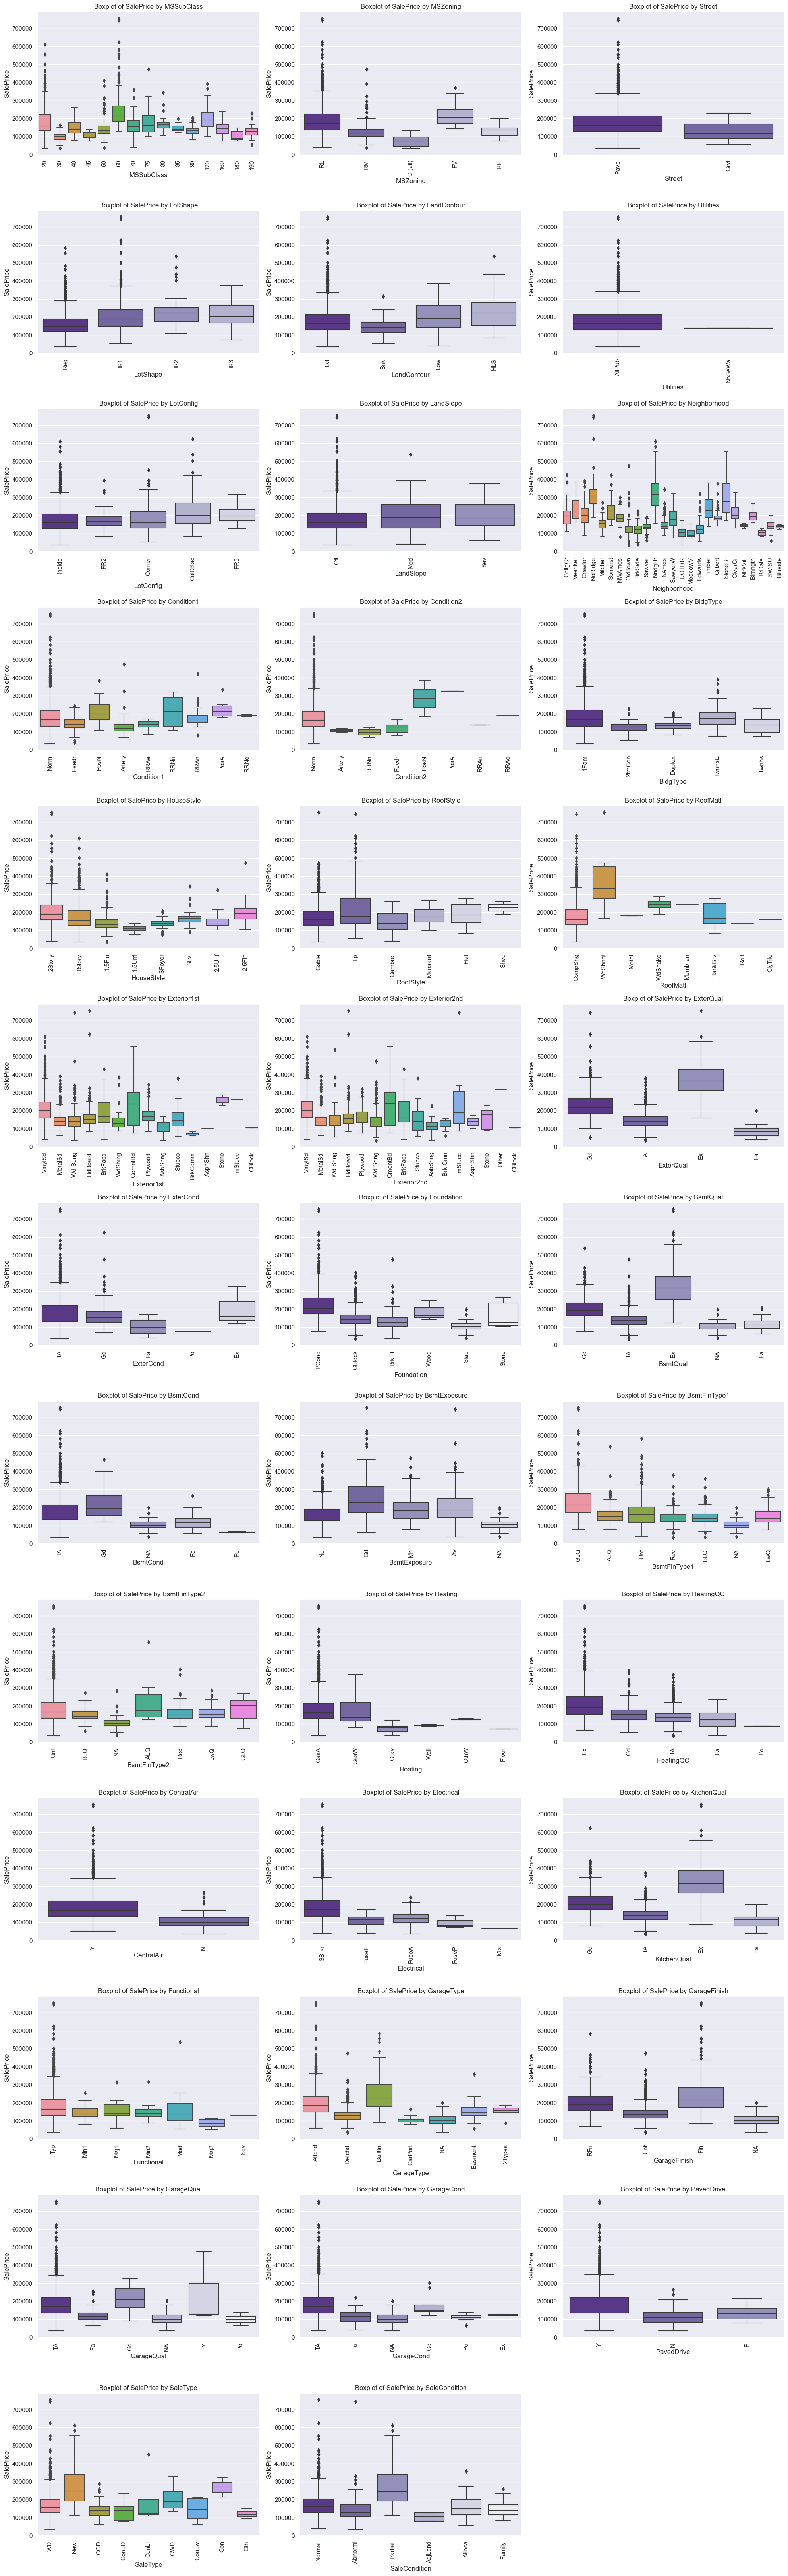

In [42]:
categorical_columns = cat_fe.columns
categorical_columns = [col for col in categorical_columns if col != 'SalePrice']

num_plots = len(categorical_columns)
num_cols = 3
num_rows = math.ceil(num_plots / num_cols) 
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))

for i, col in enumerate(categorical_columns):
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index]
    sns.boxplot(x=col, y='SalePrice', data=cat_fe, ax=ax)
    ax.set_title(f'Boxplot of SalePrice by {col}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

for i in range(num_plots, num_rows * num_cols):
    axes.flat[i].set_visible(False)

plt.tight_layout()
plt.show()


In [45]:
anova_results = []
significance_threshold = 0.05
for column in cat_fe.columns:
    if column != 'SalePrice':
        groups = []
        for category in cat_fe[column].unique():
            sale_prices = cat_fe[cat_fe[column] == category]['SalePrice']
            groups.append(sale_prices)
        
        # Perform ANOVA test
        stat, p_value = f_oneway(*groups)
        if p_value < significance_threshold:
            significance = 'Significant'
        else:
            significance = 'Not significant'
        anova_results.append({'Column': column, 'ANOVA F-statistic': stat, 'p-value': p_value, 'Significance': significance})


anova_results_df = pd.DataFrame(anova_results)
anova_results_df


Column  ANOVA F-statistic        p-value     Significance
0      MSSubClass          33.732076   8.662166e-79      Significant
1        MSZoning          43.840282   8.817634e-35      Significant
2          Street           2.459290   1.170486e-01  Not significant
3        LotShape          40.132852   6.447524e-25      Significant
4     LandContour          12.850188   2.742217e-08      Significant
5       Utilities           0.298804   5.847168e-01  Not significant
6       LotConfig           7.809954   3.163167e-06      Significant
7       LandSlope           1.958817   1.413964e-01  Not significant
8    Neighborhood          71.784865  1.558600e-225      Significant
9      Condition1           6.118017   8.904549e-08      Significant
10     Condition2           2.073899   4.342566e-02      Significant
11       BldgType          13.011077   2.056736e-10      Significant
12     HouseStyle          19.595001   3.376777e-25      Significant
13      RoofStyle          17.805497   3.653523e-17      Significant
14       RoofMatl           6.727305   7.231445e-08      Significant
15    Exterior1st          18.611743   2.586089e-43      Significant
16    Exterior2nd          17.500840   4.842186e-43      Significant
17      ExterQual         443.334831  1.439551e-204      Significant
18      ExterCond           8.798714   5.106681e-07      Significant
19     Foundation         100.253851   5.791895e-91      Significant
20       BsmtQual         316.148635  8.158548e-196      Significant
21       BsmtCond          19.708139   8.195794e-16      Significant
22   BsmtExposure          63.939761   7.557758e-50      Significant
23   BsmtFinType1          64.688200   2.386358e-71      Significant
24   BsmtFinType2           7.565378   5.225649e-08      Significant
25        Heating           4.259819   7.534721e-04      Significant
26      HeatingQC          88.394462   2.667062e-67      Significant
27     CentralAir          98.305344   1.809506e-22      Significant
28     Electrical          23.074438   1.641208e-18      Significant
29    KitchenQual         407.806352  3.032213e-192      Significant
30     Functional           4.057875   4.841697e-04      Significant
31     GarageType          80.379992   6.117026e-87      Significant
32   GarageFinish         213.867028  6.228747e-115      Significant
33     GarageQual          25.776093   5.388762e-25      Significant
34     GarageCond          25.750153   5.711746e-25      Significant
35     PavedDrive          42.024179   1.803569e-18      Significant
36       SaleType          28.863054   5.039767e-42      Significant
37  SaleCondition          45.578428   7.988268e-44      Significant

#### From the combined result of boxplot and anova p-value it is safe to conclude that features such as street, utilities, Landslope, condition2 are hightly imbalanced and wouldn't add any predictive power to the model. So it's better to delete these columns. Also feature such as heating is imbalanced but it's an important feature while buying a house, so we will use feature engineering to balance it.

In [46]:
df_train.drop(columns = ['Street','Utilities','LandSlope','Condition2','RoofMatl'], inplace =True)
df_test.drop(columns = ['Street','Utilities','LandSlope','Condition2','RoofMatl'], inplace =True)

### Analyzing discrete numerical features.

In [47]:
dis_fe = df_train[["OverallQual","OverallCond","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr",
            "KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageCars","MoSold", "SalePrice"]]

<Axes: >

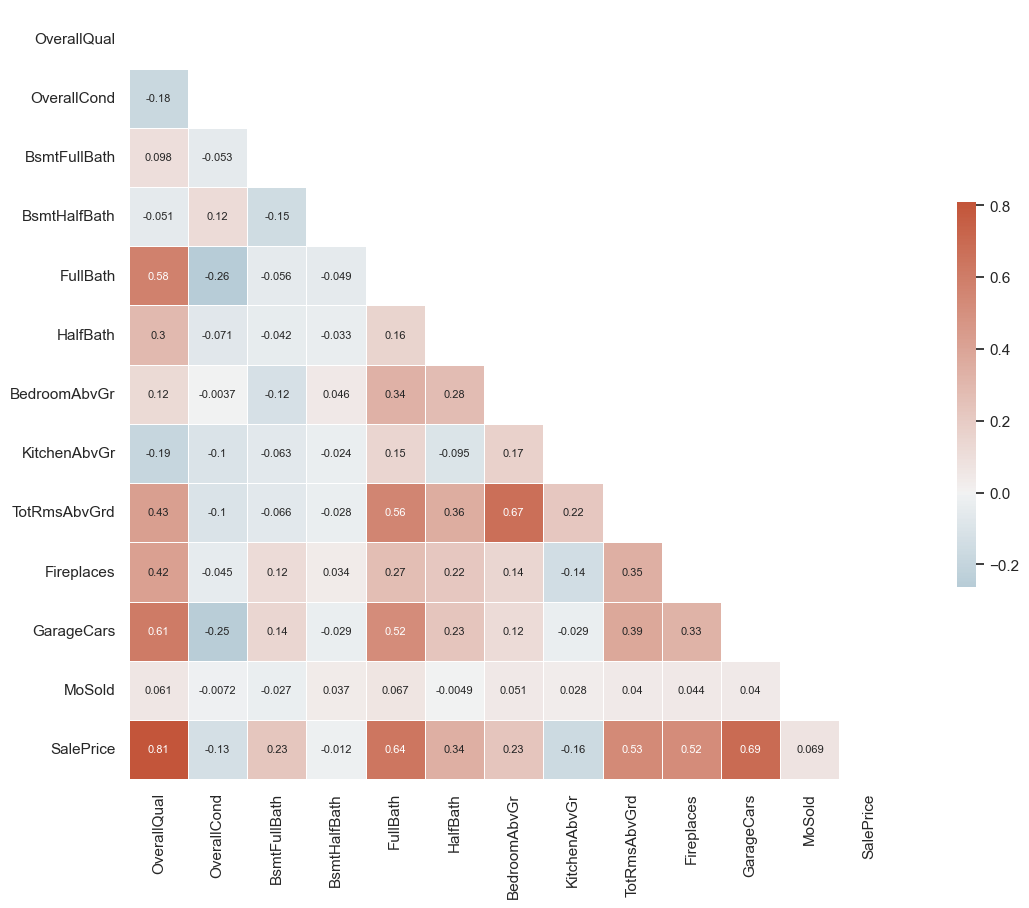

In [48]:
sns.set_theme(style="white")
corr = dis_fe.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"fontsize":8})


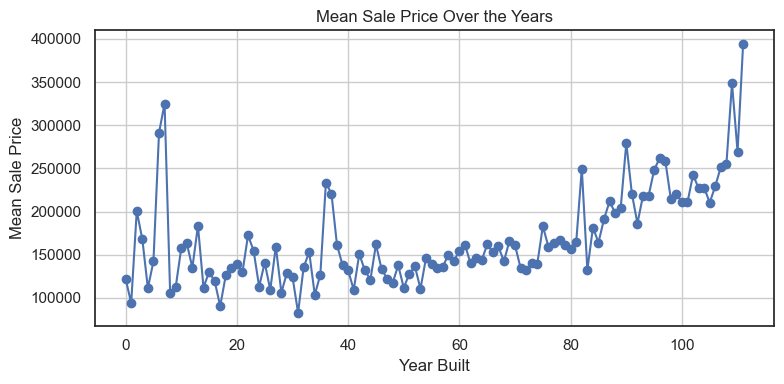

The correlation between YearBuilt and SalesPrice is 0.6226210407626337


In [49]:
## Sales price vs year
year_fe = df_train.groupby('YearBuilt')['SalePrice'].mean().reset_index()

plt.figure(figsize=(8, 4))
plt.plot(year_fe.index, year_fe['SalePrice'], marker='o', linestyle='-')
plt.xlabel('Year Built')
plt.ylabel('Mean Sale Price')
plt.title('Mean Sale Price Over the Years')
plt.grid(True)
plt.tight_layout()
plt.show()
print(f"The correlation between YearBuilt and SalesPrice is {year_fe.corr(method='spearman').iloc[0, 1]}")

## Feature Engineering

In [50]:
## Age of the house at the time of sales
df_train['House_Age'] = df_train['YrSold'] - df_train['YearBuilt']
df_test['House_Age'] = df_test['YrSold'] - df_test['YearBuilt']

## If the house is remodelled or not
df_train['Remodel_Status'] = (df_train['YearBuilt'] != df_train['YearRemodAdd']).astype(int)
df_test['Remodel_Status'] = (df_test['YearBuilt'] != df_test['YearRemodAdd']).astype(int)

## Total no of bathrooms
df_train['Total_Bathroom '] = df_train['BsmtFullBath'] + 0.5 * df_train['BsmtHalfBath'] + df_train['FullBath'] + 0.5 * df_train['HalfBath']
df_test['Total_Bathroom '] = df_test['BsmtFullBath'] + 0.5 * df_test['BsmtHalfBath'] + df_test['FullBath'] + 0.5 * df_test['HalfBath']

## Total porch surface
df_train['Total_Porch_SF'] = df_train['OpenPorchSF'] + df_train['3SsnPorch'] + df_train['EnclosedPorch'] + df_train['ScreenPorch'] + df_train['WoodDeckSF']
df_test['Total_Porch_SF'] = df_test['OpenPorchSF'] + df_test['3SsnPorch'] + df_test['EnclosedPorch'] + df_test['ScreenPorch'] + df_test['WoodDeckSF']

## Lets change the grage year to if the house have a grage or not
df_train['Have_Garage'] = (df_train['GarageYrBlt'] != 0).astype(int)
df_test['Have_Garage'] = (df_test['GarageYrBlt'] != 0).astype(int)

## We will concatenate Heating and HeatingQC
df_train["HeatingQuality"] = df_train["Heating"] + "-" + df_train["HeatingQC"]
df_test["HeatingQuality"] = df_test["Heating"] + "-" + df_test["HeatingQC"]

In [51]:
## we will drop all the irrevelant columns that is of no use after feature engineering or have low cofficient wrt to target variable
df_train.drop(columns = ['YrSold','YearBuilt','YearRemodAdd','GarageYrBlt',
                         'BsmtFinSF2','PoolArea','BsmtUnfSF','LowQualFinSF','3SsnPorch',
                         'MiscVal', 'EnclosedPorch', 'ScreenPorch','Heating','HeatingQC'], inplace =True)
df_test.drop(columns = ['YrSold','YearBuilt','YearRemodAdd','GarageYrBlt',
                         'BsmtFinSF2','PoolArea','BsmtUnfSF','LowQualFinSF','3SsnPorch',
                         'MiscVal', 'EnclosedPorch', 'ScreenPorch','Heating','HeatingQC'], inplace =True)

#### We can seee the HeatingQuality is more balanced then Heating. Further we can apply different encoding techniques

## Data Processing 2

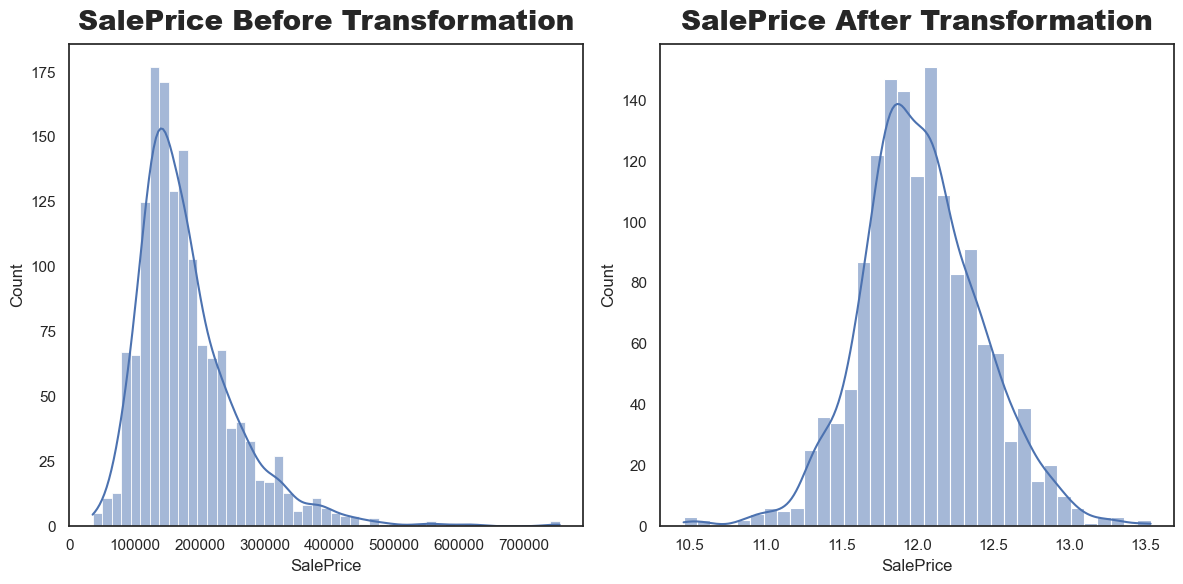

In [53]:
Target = df_train['SalePrice']
Target_log = np.log1p(df_train['SalePrice'])
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.histplot(Target, kde=True)
plt.title("SalePrice Before Transformation", size=20, pad=10, fontweight="black")

plt.subplot(1,2,2)
sns.histplot(Target_log, kde=True)
plt.title("SalePrice After Transformation", size=20, pad=10, fontweight="black")

plt.tight_layout()
plt.show()


In [54]:
## The salespeice seems to be more Gussian, so we can make this change in the actual dataset.
df_train['SalePrice'] = np.log1p(df_train["SalePrice"])

In [56]:
## Continious variables in the dataset
con_fe_var = ["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","TotalBsmtSF",
            "1stFlrSF","2ndFlrSF","GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF", "Total_Porch_SF","House_Age"]

In [57]:
## Transforming Training data
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer(method='yeo-johnson', standardize=False)
skewness_df = pd.DataFrame({'Skewness_original': df_train[con_fe_var].skew()})
for column in con_fe_var:
    
    epsilon = 0.001
    df_train[column] = df_train[column] + epsilon
    column_data = df_train[column].values.reshape(-1, 1)
    transformed_data = transformer.fit_transform(column_data)
    df_train[column] = transformed_data
    
df_train[con_fe_var] -= epsilon
skewness_df['Skewness_transformed'] = df_train[con_fe_var].skew()
skewness_df

Skewness_original  Skewness_transformed
LotFrontage              2.212959              0.171193
LotArea                 12.207688              0.026569
MasVnrArea               2.677616              0.426269
BsmtFinSF1               1.685503             -0.411351
TotalBsmtSF              1.524255              0.232605
1stFlrSF                 1.376757             -0.001106
2ndFlrSF                 0.813030              0.280726
GrLivArea                1.366560              0.000171
GarageArea               0.179981             -0.328127
WoodDeckSF               1.541376              0.132290
OpenPorchSF              2.364342             -0.014724
Total_Porch_SF           1.102313             -0.382700
House_Age                0.609030             -0.226907

In [58]:
## Transforming testing data
transformer = PowerTransformer(method='yeo-johnson', standardize=False)

for column in con_fe_var:
    
    epsilon = 0.001
    df_test[column] = df_test[column] + epsilon
    column_data = df_test[column].values.reshape(-1, 1)
    transformed_data = transformer.fit_transform(column_data)
    df_test[column] = transformed_data
    
df_test[con_fe_var] -= epsilon

### Encoding the categorical variables

In [59]:
## Target Encoding for columns that have high cardinality.
high_car = ['MSSubClass', 'Neighborhood', 'Exterior1st', 'Exterior2nd', 'HeatingQuality']
means = {}
for col in high_car:
    means[col] = df_train.groupby(col)['SalePrice'].mean()
    df_train[col] = df_train[col].map(means[col])
    df_test[col] = df_test[col].map(means[col])

In [60]:
## Now we will map all the columns who have a rating like excellent, poor, etc.
Qual_col = ['ExterQual','ExterCond','BsmtQual','BsmtCond','KitchenQual','GarageQual','GarageCond']
mapping = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0, 'NA': -1}
for col in Qual_col:
    df_train[col] = df_train[col].map(mapping)
    df_test[col] = df_test[col].map(mapping)

In [61]:
mapping = {'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'Rec': 2, 'LwQ': 1, 'Unf': 0, 'NA': -1}
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].map(mapping)
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].map(mapping)
df_test['BsmtFinType1'] = df_test['BsmtFinType1'].map(mapping)
df_test['BsmtFinType2'] = df_test['BsmtFinType2'].map(mapping)

In [62]:
mapping = {'Gd': 3, 'Av': 2, 'Mn': 1, 'No': 0, 'NA': -1}
df_train['BsmtExposure'] = df_train['BsmtExposure'].map(mapping)
df_test['BsmtExposure'] = df_test['BsmtExposure'].map(mapping)

In [63]:
mapping = {'Attchd': 5, 'BuiltIn': 4, 'Detchd': 3, '2Types': 2, 'Basment': 1, 'CarPort': 0, 'NA': -1}
df_train['GarageType'] = df_train['GarageType'].map(mapping)
df_test['GarageType'] = df_test['GarageType'].map(mapping)

In [64]:
mapping = {'Fin': 2, 'RFn': 1, 'Unf': 0, 'NA': -1}
df_train['GarageFinish'] = df_train['GarageFinish'].map(mapping)
df_test['GarageFinish'] = df_test['GarageFinish'].map(mapping)

In [65]:
## Label Encoding HouseStyle
encoder = LabelEncoder()
df_train['Electrical'] = encoder.fit_transform(df_train['Electrical'])
df_test['Electrical'] = encoder.transform(df_test['Electrical'])
df_train['HouseStyle'] = encoder.fit_transform(df_train['HouseStyle'])
df_test['HouseStyle'] = encoder.transform(df_test['HouseStyle'])

In [66]:
## one hot encoding on the left over data
one_hot_col = ['MSZoning','LotShape','LandContour','LotConfig','Condition1','BldgType','RoofStyle','Foundation',
'CentralAir','Functional','PavedDrive','SaleType','SaleCondition']
df_train = pd.get_dummies(df_train, columns=one_hot_col)
df_test = pd.get_dummies(df_test, columns=one_hot_col)

In [67]:
missing_values_summary(df_test)

2 columns have missing values


Missing Values  Percentage
MSSubClass                   1     0.06854
HeatingQuality               1     0.06854

In [68]:
df_test.head()

MSSubClass  LotFrontage    LotArea  Neighborhood  HouseStyle  OverallQual  \
0   12.052794    32.570885  67.411646     11.868052           2            5   
1   12.052794    32.876528  72.473108     11.868052           2            6   
2   12.339979    30.715065  71.682398     12.155809           5            5   
3   12.339979    31.956529  63.868508     12.155809           5            6   
4   12.171560    20.361270  49.942320     12.585490           2            8   

   OverallCond  Exterior1st  Exterior2nd    MasVnrArea  ExterQual  ExterCond  \
0            6    12.205878    12.209636 -6.395232e-07          2          2   
1            6    11.838514    11.838487  2.610140e+00          2          2   
2            5    12.205878    12.209636 -6.395232e-07          2          2   
3            6    12.205878    12.209636  2.047678e+00          2          2   
4            5    11.951905    11.974939 -6.395232e-07          3          2   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0         2         2             0             2   13.152798             1   
1         2         2             0             4   16.024234             0   
2         3         2             0             5   15.332973             0   
3         2         2             0             5   14.166861             0   
4         3         2             0             4   11.036239             0   

   TotalBsmtSF  Electrical  1stFlrSF      2ndFlrSF  GrLivArea  BsmtFullBath  \
0   235.527103           4  5.736645 -5.706434e-07   6.175705           0.0   
1   322.929447           4  6.011511 -5.706434e-07   6.497921           0.0   
2   244.932285           4  5.761333  4.263332e+00   6.662895           0.0   
3   244.525657           4  5.759816  4.250175e+00   6.650392           0.0   
4   313.728909           4  5.985555 -5.706434e-07   6.467370           0.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0           0.0         1         0             2             1            2   
1           0.0         1         1             3             1            3   
2           0.0         2         1             3             1            2   
3           0.0         2         1             3             1            3   
4           0.0         2         0             2             1            3   

   TotRmsAbvGrd  Fireplaces  GarageType  GarageFinish  GarageCars  GarageArea  \
0             5           0           5             0         1.0  230.348306   
1             6           0           5             0         1.0  117.246946   
2             6           1           5             2         2.0  165.687811   
3             7           1           5             2         2.0  162.402488   
4             5           0           5             1         2.0  172.207654   

   GarageQual  GarageCond    WoodDeckSF   OpenPorchSF  MoSold  House_Age  \
0           2           2  4.055106e+00 -4.849296e-07       6   9.105450   
1           2           2  4.707436e+00  3.809311e+00       6   9.370760   
2           2           2  4.323709e+00  3.747546e+00       3   4.573687   
3           2           2  4.654054e+00  3.809311e+00       6   4.372089   
4           2           2 -5.412459e-07  4.718839e+00       1   5.467811   

   Remodel_Status  Total_Bathroom   Total_Porch_SF  Have_Garage  \
0               0              1.0       22.469034            1   
1               0              1.5       28.300640            1   
2               1              2.5       21.897277            1   
3               0              2.5       27.283420            1   
4               0              2.0       21.047004            1   

   HeatingQuality  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0       11.813692             False        False         True        False   
1       11.813692             False        False        False         True   
2       11.910079            

In [69]:
df_test['MSSubClass'] = df_test['MSSubClass'].fillna(df_test['MSSubClass'].median())
df_test['HeatingQuality'] = df_test['HeatingQuality'].fillna(df_test['HeatingQuality'].median())

In [70]:
X = df_train.drop(columns=["SalePrice"])

In [71]:
Y = df_train['SalePrice']

In [72]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state= 42)

In [73]:
print("Dimension of x_train:=>",x_train.shape)
print("Dimension of x_test:=>",x_test.shape)
print("Dimension of y_train:=>",y_train.shape)
print("Dimension of y_test:=>",y_test.shape)

Dimension of x_train:=> (1168, 118)
Dimension of x_test:=> (292, 118)
Dimension of y_train:=> (1168,)
Dimension of y_test:=> (292,)


In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize evaluation_df as a global variable
evaluation_df = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2', 'Adjusted_R2'])

def model_evaluation(model):
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Metrics Calculation.
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = mse**0.5
    r2 = r2_score(y_test, y_test_pred)
    adjusted_r2 = 1 - ((1-r2)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
    
    # Scatter plot.
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)    
    plt.scatter(y_train, y_train_pred, color='blue', label='Train')
    plt.scatter(y_test, y_test_pred, color='red', label='Test')
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.legend()
    plt.title('Scatter Plot', fontweight="black", size=20, pad=10)
    
    # Residual plot.
    plt.subplot(1, 2, 2)
    plt.scatter(y_train_pred, y_train_pred - y_train, color='blue', label='Train')
    plt.scatter(y_test_pred, y_test_pred - y_test, color='red', label='Test')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend()
    plt.title('Residual Plot', fontweight="black", size=20, pad=10)
    plt.show()
    
    # Create a new DataFrame for the current evaluation
    evaluation_data = {'Model': str(model), 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2, 'Adjusted_R2': adjusted_r2}
    evaluation_df_new = pd.DataFrame([evaluation_data])
    
    # Concatenate the new DataFrame with the existing one
    global evaluation_df
    evaluation_df = pd.concat([evaluation_df, evaluation_df_new], ignore_index=True)
    
    return evaluation_df


### Starting with the baseline model Linear Regression

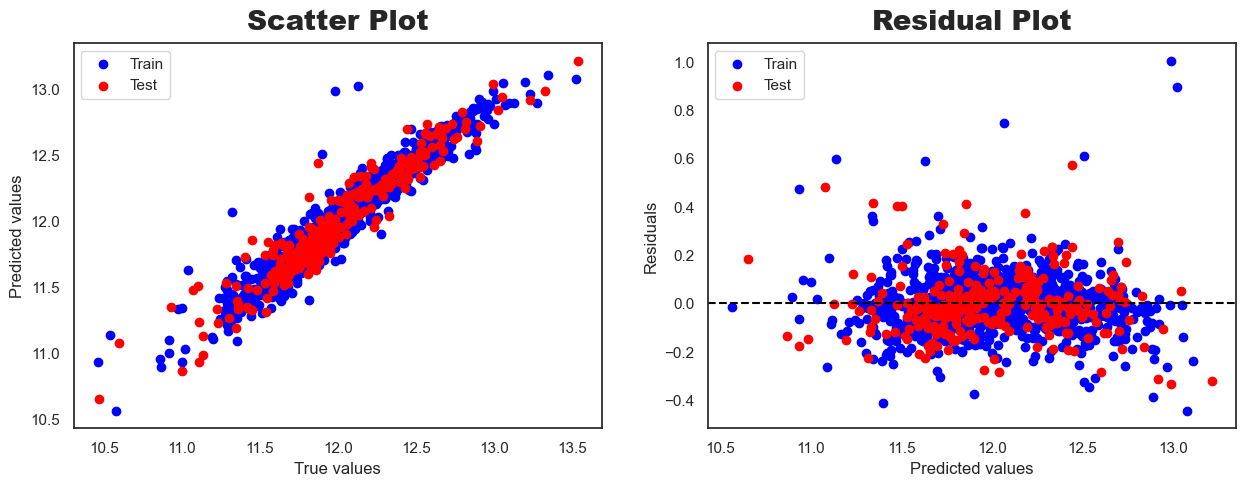

Model       MAE       MSE      RMSE        R2  Adjusted_R2
0  LinearRegression()  0.092856  0.016538  0.128602  0.911375     0.850925

In [75]:
model_evaluation(LinearRegression())

### Support vector Regressor Model.

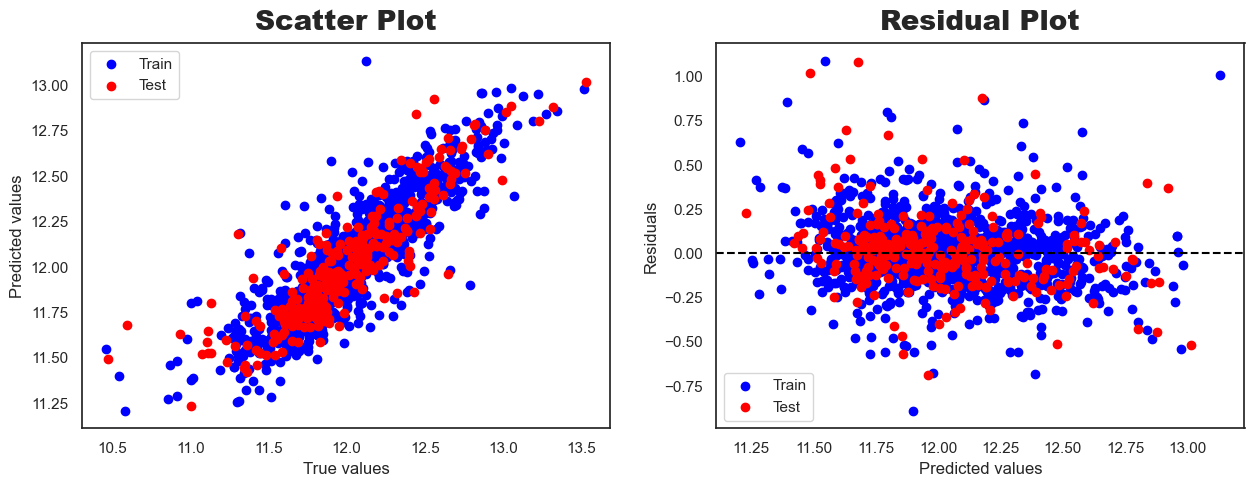

Model       MAE       MSE      RMSE        R2  Adjusted_R2
0  LinearRegression()  0.092856  0.016538  0.128602  0.911375     0.850925
1               SVR()  0.145724  0.045387  0.213043  0.756780     0.590885

In [76]:
model_evaluation(SVR())

### RandomForestRegressor

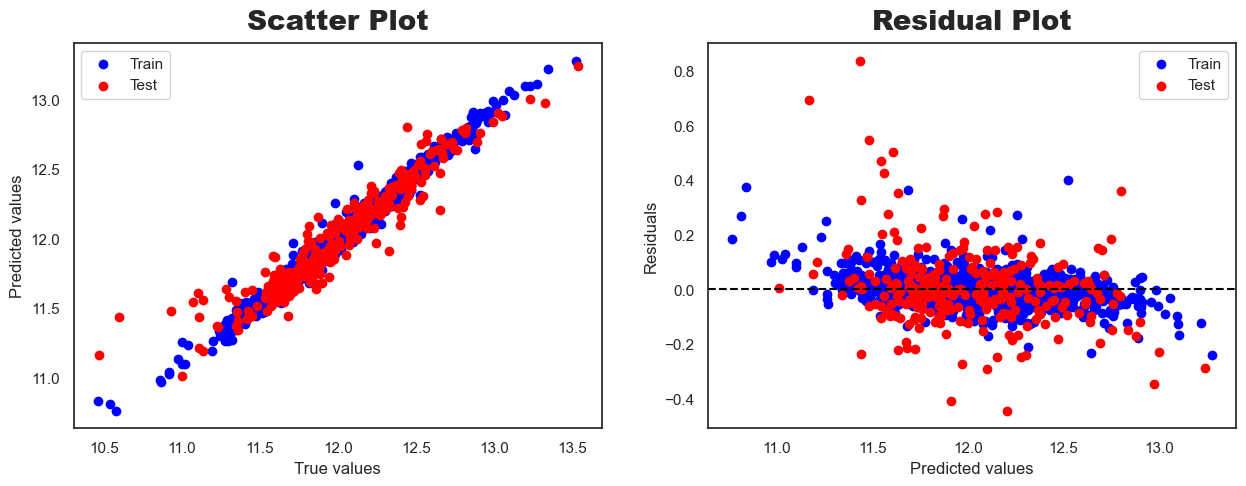

Model       MAE       MSE      RMSE        R2  \
0       LinearRegression()  0.092856  0.016538  0.128602  0.911375   
1                    SVR()  0.145724  0.045387  0.213043  0.756780   
2  RandomForestRegressor()  0.092190  0.020138  0.141910  0.892083   

   Adjusted_R2  
0     0.850925  
1     0.590885  
2     0.818475

In [77]:
model_evaluation(RandomForestRegressor())

### AdaBoostRegressor

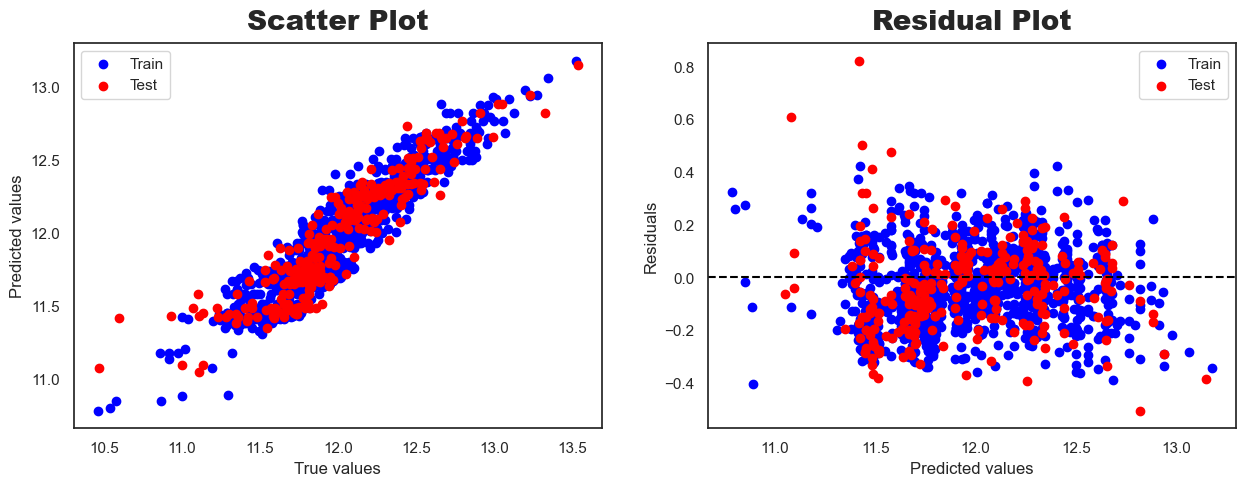

Model       MAE       MSE      RMSE        R2  \
0       LinearRegression()  0.092856  0.016538  0.128602  0.911375   
1                    SVR()  0.145724  0.045387  0.213043  0.756780   
2  RandomForestRegressor()  0.092190  0.020138  0.141910  0.892083   
3      AdaBoostRegressor()  0.133274  0.030067  0.173397  0.838881   

   Adjusted_R2  
0     0.850925  
1     0.590885  
2     0.818475  
3     0.728984

In [78]:
model_evaluation(AdaBoostRegressor())

### GradientBoostingRegressor

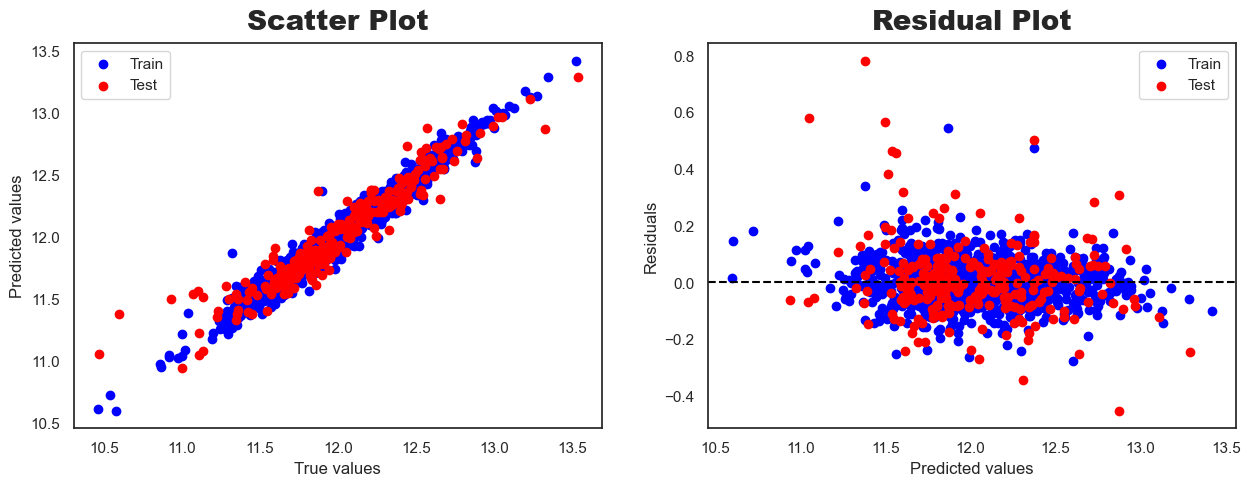

Model       MAE       MSE      RMSE        R2  \
0           LinearRegression()  0.092856  0.016538  0.128602  0.911375   
1                        SVR()  0.145724  0.045387  0.213043  0.756780   
2      RandomForestRegressor()  0.092190  0.020138  0.141910  0.892083   
3          AdaBoostRegressor()  0.133274  0.030067  0.173397  0.838881   
4  GradientBoostingRegressor()  0.087222  0.017618  0.132732  0.905590   

   Adjusted_R2  
0     0.850925  
1     0.590885  
2     0.818475  
3     0.728984  
4     0.841195

In [79]:
model_evaluation(GradientBoostingRegressor())

### Lasso

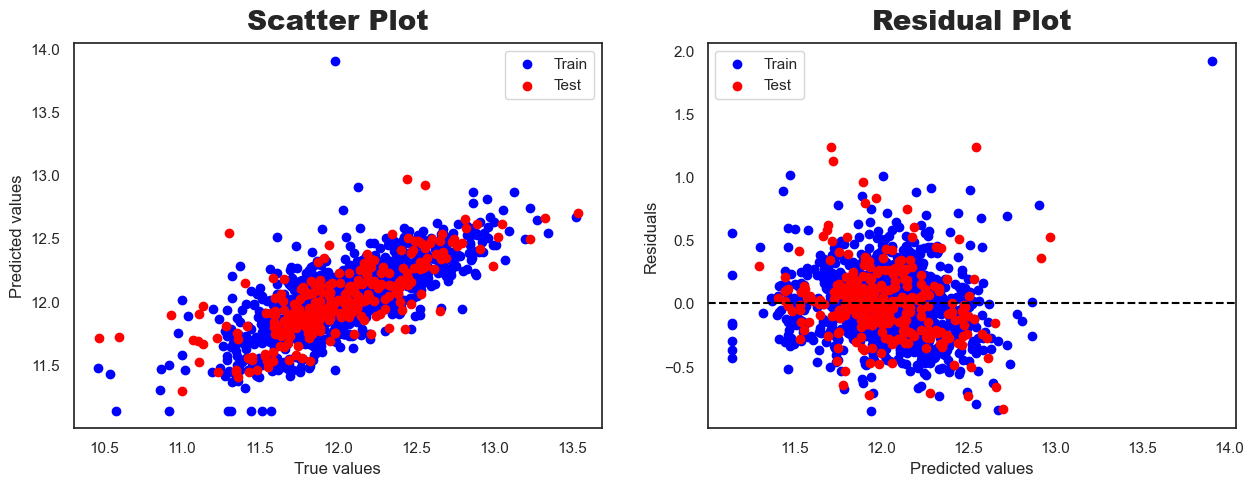

Model       MAE       MSE      RMSE        R2  \
0           LinearRegression()  0.092856  0.016538  0.128602  0.911375   
1                        SVR()  0.145724  0.045387  0.213043  0.756780   
2      RandomForestRegressor()  0.092190  0.020138  0.141910  0.892083   
3          AdaBoostRegressor()  0.133274  0.030067  0.173397  0.838881   
4  GradientBoostingRegressor()  0.087222  0.017618  0.132732  0.905590   
5                      Lasso()  0.204251  0.082404  0.287061  0.558417   

   Adjusted_R2  
0     0.850925  
1     0.590885  
2     0.818475  
3     0.728984  
4     0.841195  
5     0.257222

In [80]:
model_evaluation(Lasso())

### Ridge

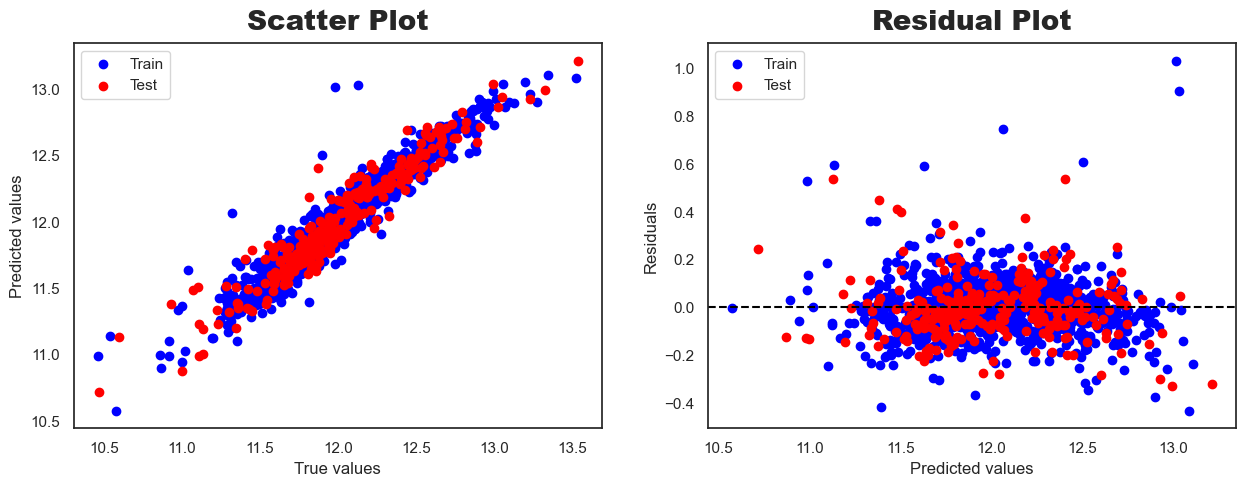

Model       MAE       MSE      RMSE        R2  \
0           LinearRegression()  0.092856  0.016538  0.128602  0.911375   
1                        SVR()  0.145724  0.045387  0.213043  0.756780   
2      RandomForestRegressor()  0.092190  0.020138  0.141910  0.892083   
3          AdaBoostRegressor()  0.133274  0.030067  0.173397  0.838881   
4  GradientBoostingRegressor()  0.087222  0.017618  0.132732  0.905590   
5                      Lasso()  0.204251  0.082404  0.287061  0.558417   
6                      Ridge()  0.091961  0.016219  0.127354  0.913087   

   Adjusted_R2  
0     0.850925  
1     0.590885  
2     0.818475  
3     0.728984  
4     0.841195  
5     0.257222  
6     0.853805

In [81]:
model_evaluation(Ridge())

### ElasticNet

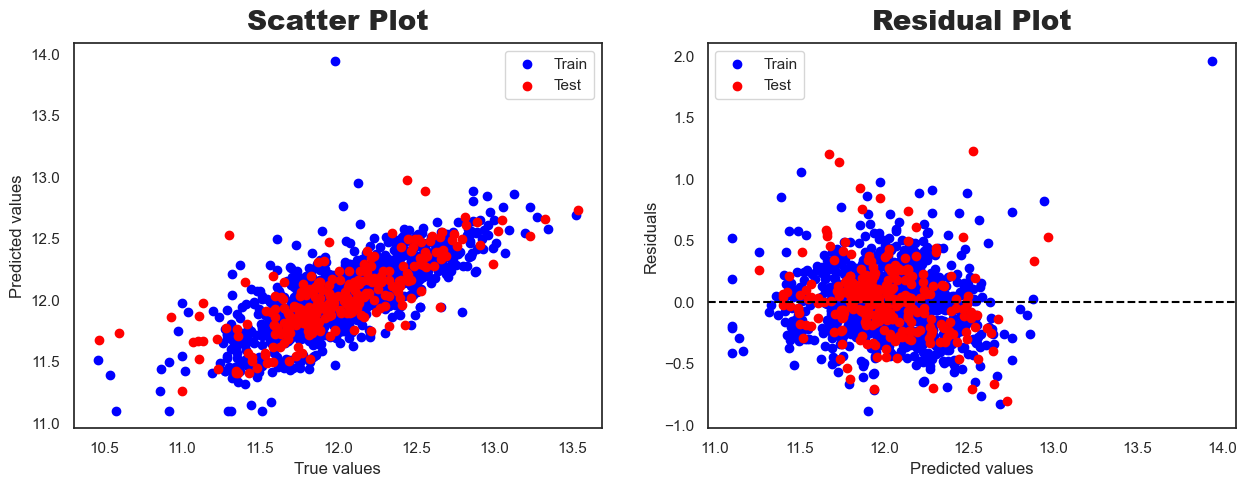

Model       MAE       MSE      RMSE        R2  \
0           LinearRegression()  0.092856  0.016538  0.128602  0.911375   
1                        SVR()  0.145724  0.045387  0.213043  0.756780   
2      RandomForestRegressor()  0.092190  0.020138  0.141910  0.892083   
3          AdaBoostRegressor()  0.133274  0.030067  0.173397  0.838881   
4  GradientBoostingRegressor()  0.087222  0.017618  0.132732  0.905590   
5                      Lasso()  0.204251  0.082404  0.287061  0.558417   
6                      Ridge()  0.091961  0.016219  0.127354  0.913087   
7                 ElasticNet()  0.200255  0.078778  0.280674  0.577848   

   Adjusted_R2  
0     0.850925  
1     0.590885  
2     0.818475  
3     0.728984  
4     0.841195  
5     0.257222  
6     0.853805  
7     0.289906

In [82]:
model_evaluation(ElasticNet())

### XGBRegressor

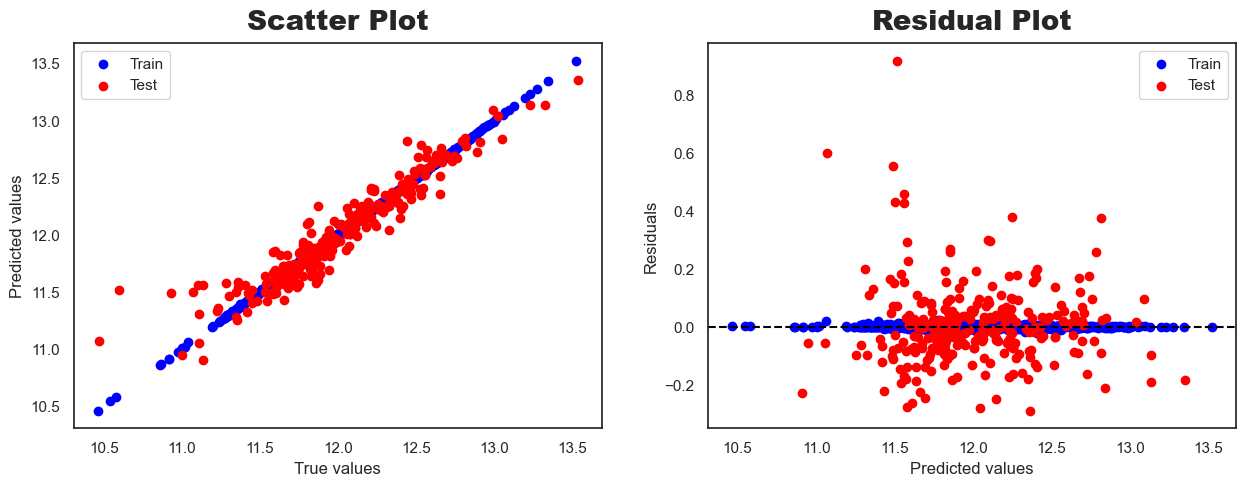

Model       MAE       MSE  \
0                                 LinearRegression()  0.092856  0.016538   
1                                              SVR()  0.145724  0.045387   
2                            RandomForestRegressor()  0.092190  0.020138   
3                                AdaBoostRegressor()  0.133274  0.030067   
4                        GradientBoostingRegressor()  0.087222  0.017618   
5                                            Lasso()  0.204251  0.082404   
6                                            Ridge()  0.091961  0.016219   
7                                       ElasticNet()  0.200255  0.078778   
8  XGBRegressor(base_score=None, booster=None, ca...  0.091736  0.018803   

       RMSE        R2  Adjusted_R2  
0  0.128602  0.911375     0.850925  
1  0.213043  0.756780     0.590885  
2  0.141910  0.892083     0.818475  
3  0.173397  0.838881     0.728984  
4  0.132732  0.905590     0.841195  
5  0.287061  0.558417     0.257222  
6  0.127354  0.913087     0.853805  
7  0.280674  0.577848     0.289906  
8  0.137125  0.899238     0.830510

In [83]:
model_evaluation(XGBRegressor())

### LGBMRegressor

  File "C:\Users\him10\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2870
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 89
[LightGBM] [Info] Start training from score 12.030658


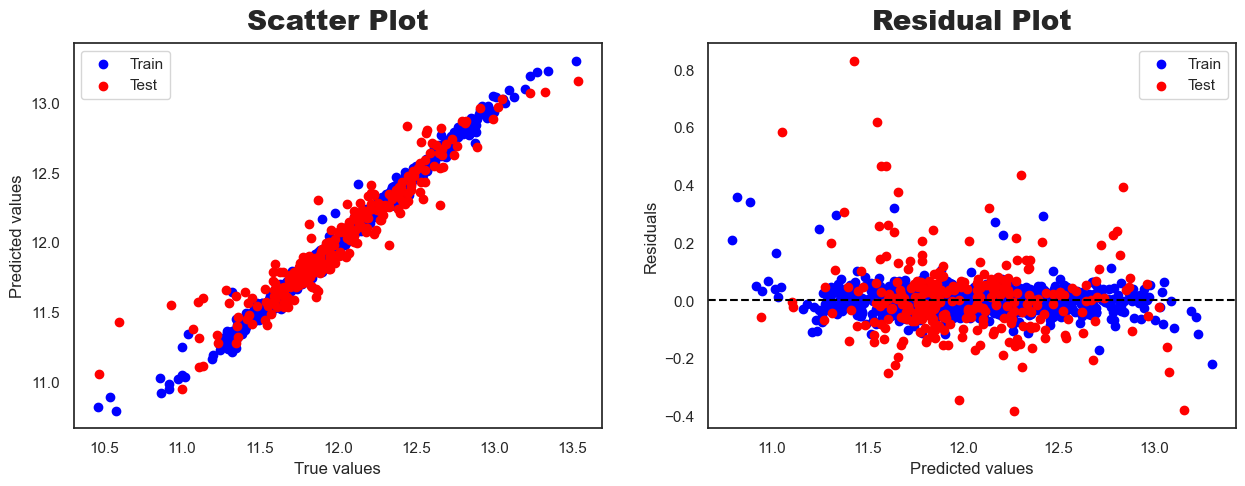

Model       MAE       MSE  \
0                                 LinearRegression()  0.092856  0.016538   
1                                              SVR()  0.145724  0.045387   
2                            RandomForestRegressor()  0.092190  0.020138   
3                                AdaBoostRegressor()  0.133274  0.030067   
4                        GradientBoostingRegressor()  0.087222  0.017618   
5                                            Lasso()  0.204251  0.082404   
6                                            Ridge()  0.091961  0.016219   
7                                       ElasticNet()  0.200255  0.078778   
8  XGBRegressor(base_score=None, booster=None, ca...  0.091736  0.018803   
9                                    LGBMRegressor()  0.088258  0.018206   

       RMSE        R2  Adjusted_R2  
0  0.128602  0.911375     0.850925  
1  0.213043  0.756780     0.590885  
2  0.141910  0.892083     0.818475  
3  0.173397  0.838881     0.728984  
4  0.132732  0.905590     0.841195  
5  0.287061  0.558417     0.257222  
6  0.127354  0.913087     0.853805  
7  0.280674  0.577848     0.289906  
8  0.137125  0.899238     0.830510  
9  0.134931  0.902437     0.835891

In [84]:
model_evaluation(LGBMRegressor())

### CatBoostRegressor

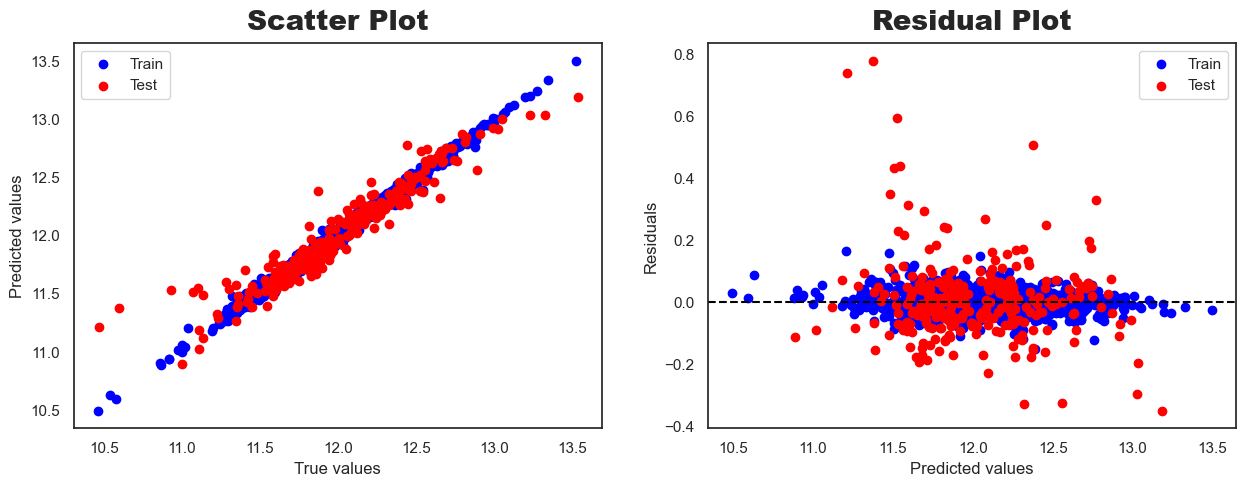

Model       MAE       MSE  \
0                                  LinearRegression()  0.092856  0.016538   
1                                               SVR()  0.145724  0.045387   
2                             RandomForestRegressor()  0.092190  0.020138   
3                                 AdaBoostRegressor()  0.133274  0.030067   
4                         GradientBoostingRegressor()  0.087222  0.017618   
5                                             Lasso()  0.204251  0.082404   
6                                             Ridge()  0.091961  0.016219   
7                                        ElasticNet()  0.200255  0.078778   
8   XGBRegressor(base_score=None, booster=None, ca...  0.091736  0.018803   
9                                     LGBMRegressor()  0.088258  0.018206   
10  <catboost.core.CatBoostRegressor object at 0x0...  0.083826  0.017229   

        RMSE        R2  Adjusted_R2  
0   0.128602  0.911375     0.850925  
1   0.213043  0.756780     0.590885  
2   0.141910  0.892083     0.818475  
3   0.173397  0.838881     0.728984  
4   0.132732  0.905590     0.841195  
5   0.287061  0.558417     0.257222  
6   0.127354  0.913087     0.853805  
7   0.280674  0.577848     0.289906  
8   0.137125  0.899238     0.830510  
9   0.134931  0.902437     0.835891  
10  0.131261  0.907672     0.844697

In [85]:
model_evaluation(CatBoostRegressor(verbose=False))

### Ridge out performs all other ML models. We will hypertune all the models thats have R-square more than 90%

### Hyper Tuning Ridge()

In [86]:
ridge = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [87]:
grid_search.best_params_

{'alpha': 1.0}

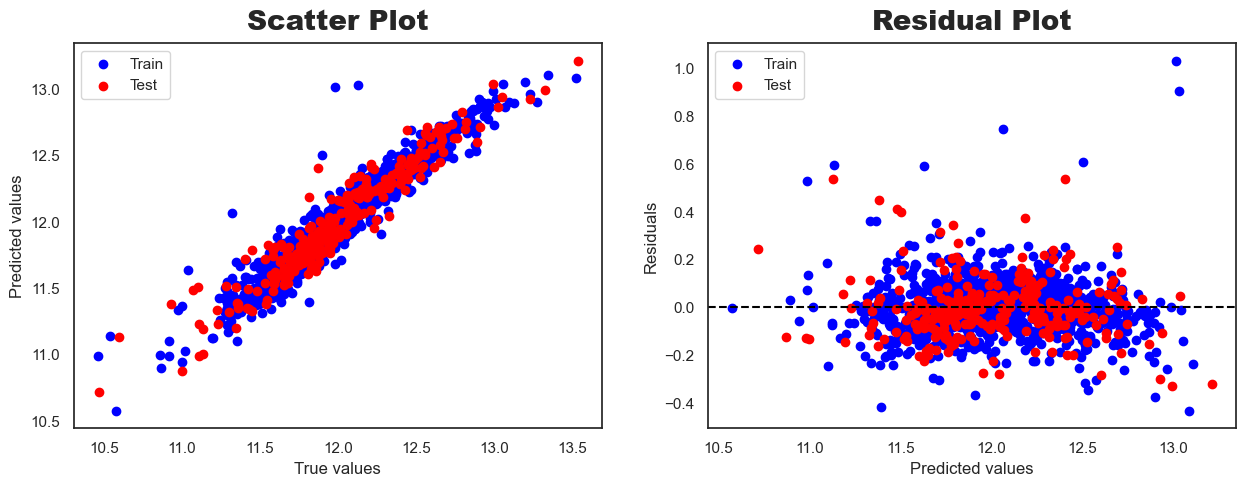

Model       MAE       MSE  \
0                                  LinearRegression()  0.092856  0.016538   
1                                               SVR()  0.145724  0.045387   
2                             RandomForestRegressor()  0.092190  0.020138   
3                                 AdaBoostRegressor()  0.133274  0.030067   
4                         GradientBoostingRegressor()  0.087222  0.017618   
5                                             Lasso()  0.204251  0.082404   
6                                             Ridge()  0.091961  0.016219   
7                                        ElasticNet()  0.200255  0.078778   
8   XGBRegressor(base_score=None, booster=None, ca...  0.091736  0.018803   
9                                     LGBMRegressor()  0.088258  0.018206   
10  <catboost.core.CatBoostRegressor object at 0x0...  0.083826  0.017229   
11                                            Ridge()  0.091961  0.016219   

        RMSE        R2  Adjusted_R2  
0   0.128602  0.911375     0.850925  
1   0.213043  0.756780     0.590885  
2   0.141910  0.892083     0.818475  
3   0.173397  0.838881     0.728984  
4   0.132732  0.905590     0.841195  
5   0.287061  0.558417     0.257222  
6   0.127354  0.913087     0.853805  
7   0.280674  0.577848     0.289906  
8   0.137125  0.899238     0.830510  
9   0.134931  0.902437     0.835891  
10  0.131261  0.907672     0.844697  
11  0.127354  0.913087     0.853805

In [88]:
model_evaluation(Ridge(alpha = 1.0))

### Since hyperparameter tuning for linear regression typically involves optimizing parameters such as regularization strength (alpha or lambda) in techniques like Ridge or Lasso regression. we will skip it.

### Hypertuning Catboost Regressor

In [89]:
param_grid = {
    'learning_rate': [0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3,5],
    'iterations': [300, 500, 1000]
}

catboost = CatBoostRegressor(verbose=False)
grid_search = GridSearchCV(estimator=catboost, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Get best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [90]:
best_params

{'depth': 4, 'iterations': 1000, 'l2_leaf_reg': 1, 'learning_rate': 0.05}

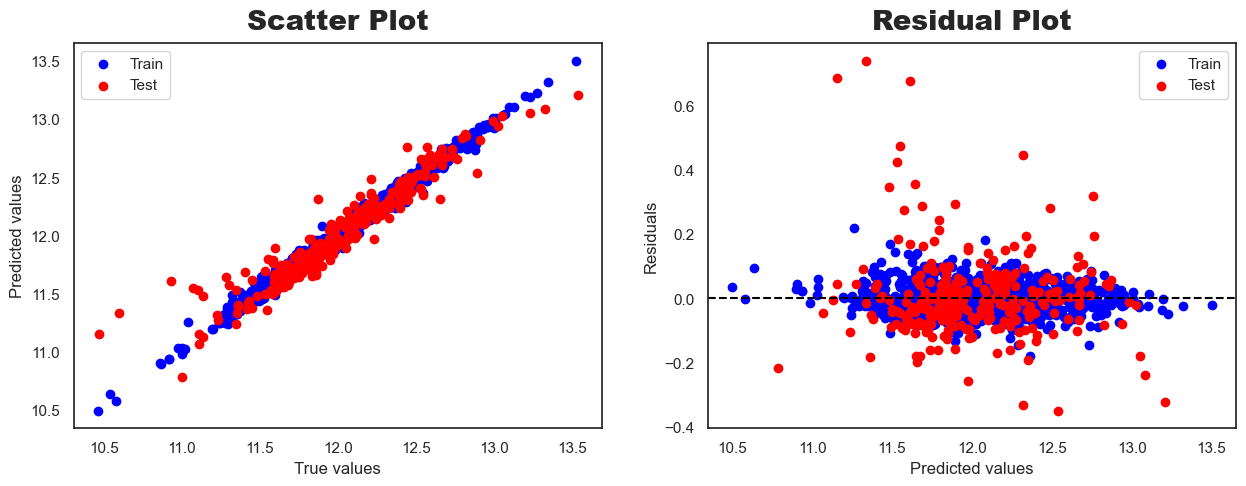

Model       MAE       MSE  \
0                                  LinearRegression()  0.092856  0.016538   
1                                               SVR()  0.145724  0.045387   
2                             RandomForestRegressor()  0.092190  0.020138   
3                                 AdaBoostRegressor()  0.133274  0.030067   
4                         GradientBoostingRegressor()  0.087222  0.017618   
5                                             Lasso()  0.204251  0.082404   
6                                             Ridge()  0.091961  0.016219   
7                                        ElasticNet()  0.200255  0.078778   
8   XGBRegressor(base_score=None, booster=None, ca...  0.091736  0.018803   
9                                     LGBMRegressor()  0.088258  0.018206   
10  <catboost.core.CatBoostRegressor object at 0x0...  0.083826  0.017229   
11                                            Ridge()  0.091961  0.016219   
12  <catboost.core.CatBoostRegressor object at 0x0...  0.082863  0.017015   

        RMSE        R2  Adjusted_R2  
0   0.128602  0.911375     0.850925  
1   0.213043  0.756780     0.590885  
2   0.141910  0.892083     0.818475  
3   0.173397  0.838881     0.728984  
4   0.132732  0.905590     0.841195  
5   0.287061  0.558417     0.257222  
6   0.127354  0.913087     0.853805  
7   0.280674  0.577848     0.289906  
8   0.137125  0.899238     0.830510  
9   0.134931  0.902437     0.835891  
10  0.131261  0.907672     0.844697  
11  0.127354  0.913087     0.853805  
12  0.130440  0.908823     0.846634

In [91]:
model_evaluation(best_model)

### Hyper tuning GradientBoostingRegressor

In [92]:
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinkage used in update
    'max_depth': [3, 4, 5],  # Maximum depth of the individual estimators
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

gb_regressor = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_gb_model = grid_search.best_estimator_


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}


In [93]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 150}

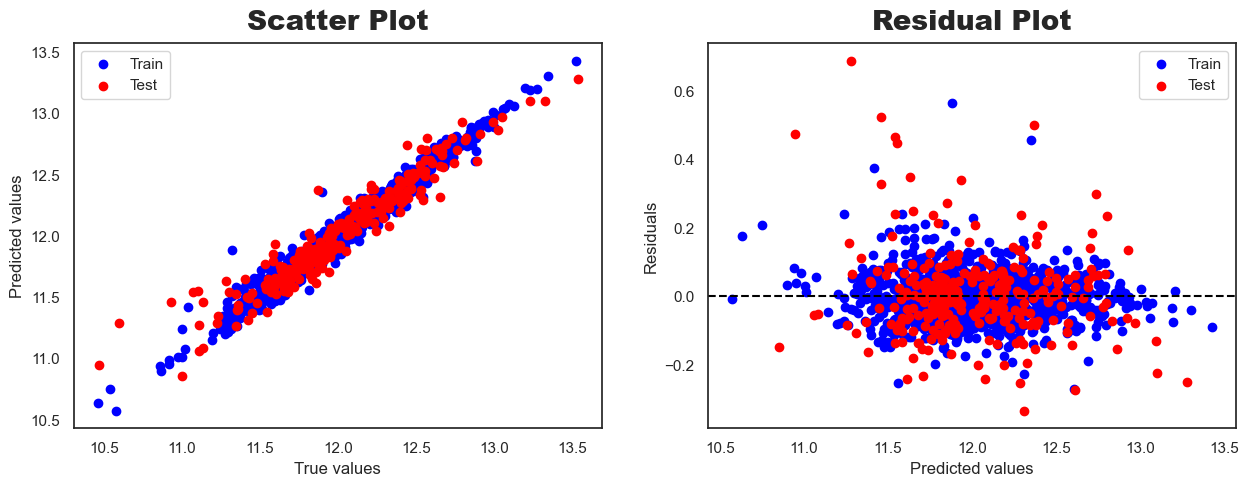

Model       MAE       MSE  \
0                                  LinearRegression()  0.092856  0.016538   
1                                               SVR()  0.145724  0.045387   
2                             RandomForestRegressor()  0.092190  0.020138   
3                                 AdaBoostRegressor()  0.133274  0.030067   
4                         GradientBoostingRegressor()  0.087222  0.017618   
5                                             Lasso()  0.204251  0.082404   
6                                             Ridge()  0.091961  0.016219   
7                                        ElasticNet()  0.200255  0.078778   
8   XGBRegressor(base_score=None, booster=None, ca...  0.091736  0.018803   
9                                     LGBMRegressor()  0.088258  0.018206   
10  <catboost.core.CatBoostRegressor object at 0x0...  0.083826  0.017229   
11                                            Ridge()  0.091961  0.016219   
12  <catboost.core.CatBoostRegressor object at 0x0...  0.082863  0.017015   
13  GradientBoostingRegressor(min_samples_leaf=4, ...  0.086255  0.016144   

        RMSE        R2  Adjusted_R2  
0   0.128602  0.911375     0.850925  
1   0.213043  0.756780     0.590885  
2   0.141910  0.892083     0.818475  
3   0.173397  0.838881     0.728984  
4   0.132732  0.905590     0.841195  
5   0.287061  0.558417     0.257222  
6   0.127354  0.913087     0.853805  
7   0.280674  0.577848     0.289906  
8   0.137125  0.899238     0.830510  
9   0.134931  0.902437     0.835891  
10  0.131261  0.907672     0.844697  
11  0.127354  0.913087     0.853805  
12  0.130440  0.908823     0.846634  
13  0.127059  0.913489     0.854481

In [94]:
model_evaluation(best_gb_model)

### Hyper tuning LGBMRegessor

In [95]:
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinkage used in update
    'max_depth': [3, 4, 5],  # Maximum depth of the individual estimators
    'num_leaves': [15, 31, 63],  # Maximum number of leaves in one tree
    'min_child_samples': [20, 50, 100]  # Minimum number of data needed in a child (leaf)
}
lgb_regressor = LGBMRegressor(random_state=42)
grid_search = GridSearchCV(estimator=lgb_regressor, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_lgb_model = grid_search.best_estimator_

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002474 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2870
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 89
[LightGBM] [Info] Start training from score 12.030658
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001750 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2870
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 89
[LightGBM] [Info] Start training from score 12.030658
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

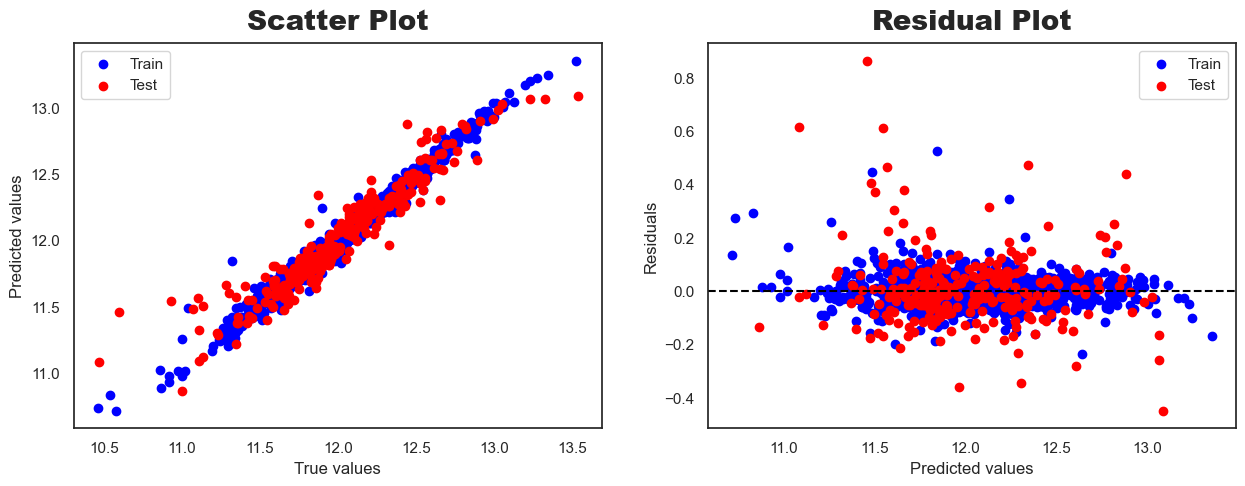

Model       MAE       MSE  \
0                                  LinearRegression()  0.092856  0.016538   
1                                               SVR()  0.145724  0.045387   
2                             RandomForestRegressor()  0.092190  0.020138   
3                                 AdaBoostRegressor()  0.133274  0.030067   
4                         GradientBoostingRegressor()  0.087222  0.017618   
5                                             Lasso()  0.204251  0.082404   
6                                             Ridge()  0.091961  0.016219   
7                                        ElasticNet()  0.200255  0.078778   
8   XGBRegressor(base_score=None, booster=None, ca...  0.091736  0.018803   
9                                     LGBMRegressor()  0.088258  0.018206   
10  <catboost.core.CatBoostRegressor object at 0x0...  0.083826  0.017229   
11                                            Ridge()  0.091961  0.016219   
12  <catboost.core.CatBoostRegressor object at 0x0...  0.082863  0.017015   
13  GradientBoostingRegressor(min_samples_leaf=4, ...  0.086255  0.016144   
14  LGBMRegressor(max_depth=5, n_estimators=150, r...  0.089160  0.018967   

        RMSE        R2  Adjusted_R2  
0   0.128602  0.911375     0.850925  
1   0.213043  0.756780     0.590885  
2   0.141910  0.892083     0.818475  
3   0.173397  0.838881     0.728984  
4   0.132732  0.905590     0.841195  
5   0.287061  0.558417     0.257222  
6   0.127354  0.913087     0.853805  
7   0.280674  0.577848     0.289906  
8   0.137125  0.899238     0.830510  
9   0.134931  0.902437     0.835891  
10  0.131261  0.907672     0.844697  
11  0.127354  0.913087     0.853805  
12  0.130440  0.908823     0.846634  
13  0.127059  0.913489     0.854481  
14  0.137720  0.898361     0.829035

In [96]:
model_evaluation(best_lgb_model)

#### GradientBoostingRegressor with hyperparamertuning have out performaed the other ML model. No we will stack the model to see if there is any improvement.

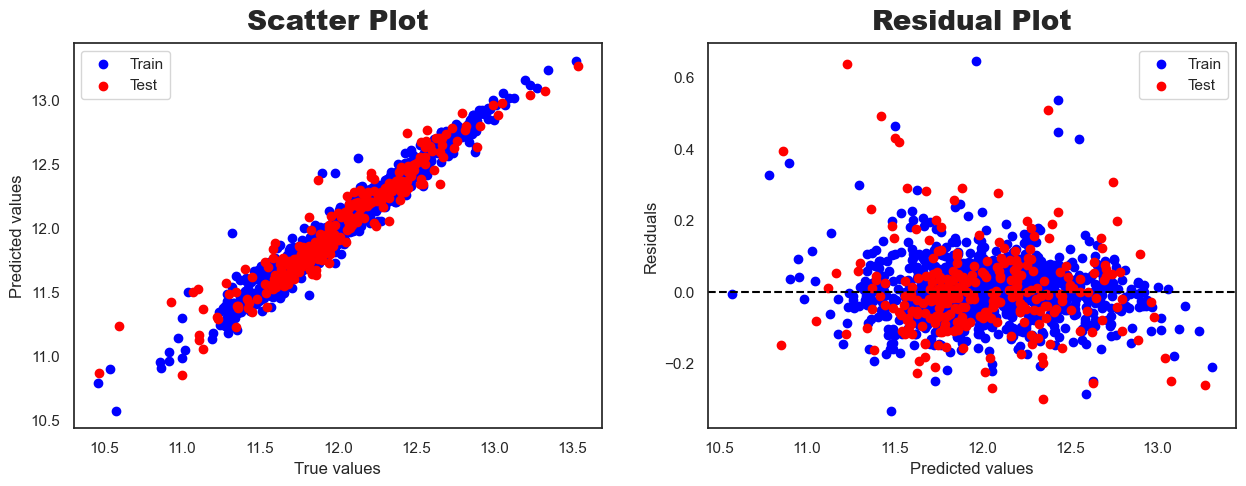

Model       MAE       MSE  \
0                                  LinearRegression()  0.092856  0.016538   
1                                               SVR()  0.145724  0.045387   
2                             RandomForestRegressor()  0.092190  0.020138   
3                                 AdaBoostRegressor()  0.133274  0.030067   
4                         GradientBoostingRegressor()  0.087222  0.017618   
5                                             Lasso()  0.204251  0.082404   
6                                             Ridge()  0.091961  0.016219   
7                                        ElasticNet()  0.200255  0.078778   
8   XGBRegressor(base_score=None, booster=None, ca...  0.091736  0.018803   
9                                     LGBMRegressor()  0.088258  0.018206   
10  <catboost.core.CatBoostRegressor object at 0x0...  0.083826  0.017229   
11                                            Ridge()  0.091961  0.016219   
12  <catboost.core.CatBoostRegressor object at 0x0...  0.082863  0.017015   
13  GradientBoostingRegressor(min_samples_leaf=4, ...  0.086255  0.016144   
14  LGBMRegressor(max_depth=5, n_estimators=150, r...  0.089160  0.018967   
15  StackingCVRegressor(meta_regressor=Ridge(),\n ...  0.082672  0.014700   

        RMSE        R2  Adjusted_R2  
0   0.128602  0.911375     0.850925  
1   0.213043  0.756780     0.590885  
2   0.141910  0.892083     0.818475  
3   0.173397  0.838881     0.728984  
4   0.132732  0.905590     0.841195  
5   0.287061  0.558417     0.257222  
6   0.127354  0.913087     0.853805  
7   0.280674  0.577848     0.289906  
8   0.137125  0.899238     0.830510  
9   0.134931  0.902437     0.835891  
10  0.131261  0.907672     0.844697  
11  0.127354  0.913087     0.853805  
12  0.130440  0.908823     0.846634  
13  0.127059  0.913489     0.854481  
14  0.137720  0.898361     0.829035  
15  0.121245  0.921224     0.867493

In [97]:
ridge = Ridge()
Best_GB = best_gb_model
svr = SVR(kernel='rbf')

# Define the meta regressor
meta_regressor = Ridge()

# Define the stacking regressor
final_model = StackingCVRegressor(regressors=(ridge, Best_GB, svr),
                            meta_regressor=meta_regressor,
                            cv=5)
model_evaluation(final_model)

In [98]:
pre_test = final_model.predict(df_test)

In [99]:
Predicted_values = pd.DataFrame({'Id': test_id})

In [100]:
Predicted_values['SalePrice'] = np.floor(np.expm1(pre_test))

In [94]:
Predicted_values.to_csv('Predicted_values.csv', index=False)